In [1]:
import pandas as pd
import numpy as np
import lux
import warnings



In [ ]:
from bokeh.io import show, output_notebook #, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap


output_notebook()

In [3]:
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',300)

In [2]:
path_processed = "../data/processed/pjud"

In [3]:
# Carga de datos ...
df_causas = pd.read_feather(f"{path_processed}/consolidated_FullData.feather")

In [4]:
df_causas.columns

Index(['index', 'region', 'cod_corte', 'corte', 'tribunal_rit', 'cod_tribunal',
       'rit', 'tribunal', 'tipo_juzgado', 'dotacion_jueces', 'tipo_causa',
       'fecha_ingreso', 'año_ingreso', 'cod_materia', 'materia',
       'tipologia_materia', 'vigencia_materia', 'tipo_audiencia',
       'fecha_programacion_audiencia', 'fecha_audiencia', 'dias_agendamiento',
       'duracion_audiencia_minutos', 'total_audiencias',
       'total_ingresos_materia', 'total_terminos', 'fecha_termino',
       'año_termino', 'duracion_causa', 'motivo_termino', 'asiento', 'comunas',
       'poblacion', 'hombres', 'mujeres', 'urbano', 'rural'],
      dtype='object')

In [4]:
df_causas.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 14060425 entries, 0 to 14060424
Data columns (total 36 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   index                         int64         
 1   region                        object        
 2   cod_corte                     float64       
 3   corte                         object        
 4   tribunal_rit                  object        
 5   cod_tribunal                  int64         
 6   rit                           object        
 7   tribunal                      object        
 8   tipo_juzgado                  object        
 9   dotacion_jueces               int64         
 10  tipo_causa                    object        
 11  fecha_ingreso                 datetime64[ns]
 12  año_ingreso                   float64       
 13  cod_materia                   float64       
 14  materia                       object        
 15  tipologia_materia             

In [5]:
df_causas

,index,region,cod_corte,corte,tribunal_rit,cod_tribunal,rit,tribunal,tipo_juzgado,dotacion_jueces,...,año_termino,duracion_causa,motivo_termino,asiento,comunas,poblacion,hombres,mujeres,urbano,rural
0,0,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-1-2018,988,1-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,...,2018.0,62.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
1,1,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-1-2018,988,1-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,...,2018.0,62.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
2,2,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-2-2018,988,2-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,...,2019.0,621.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
3,3,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-2-2018,988,2-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,...,2019.0,621.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
4,4,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-2-2018,988,2-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,...,2019.0,621.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14060420,14060420,REGION METROPOLITANA DE SANTIAGO,91.0,C.A. DE SAN MIGUEL,1236-1804-2015,1236,1804-2015,JUZGADO DE GARANTIA PUENTE ALTO,GARANTIA,8,...,NaN,NaN,None,PUENTE ALTO,"[PUENTE ALTO, SAN JOSE DE MAIPO, PIRQUE]",612816,298437,314379,590972,21844
14060421,14060421,REGION METROPOLITANA DE SANTIAGO,91.0,C.A. DE SAN MIGUEL,1236-1804-2015,1236,1804-2015,JUZGADO DE GARANTIA PUENTE ALTO,GARANTIA,8,...,NaN,NaN,None,PUENTE ALTO,"[PUENTE ALTO, SAN JOSE DE MAIPO, PIRQUE]",612816,298437,314379,590972,21844
14060422,14060422,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,35.0,C.A. DE RANCAGUA,1069-3161-2015,1069,3161-2015,JUZGADO DE GARANTIA GRANEROS,GARANTIA,2,...,NaN,NaN,None,GRANEROS,"[MOSTAZAL, GRANEROS, CODEGUA]",71768,35807,35961,57794,13974
14060423,14060423,REGION METROPOLITANA DE SANTIAGO,90.0,C.A. DE SANTIAGO,1228-14033-2015,1228,14033-2015,NOVENO JUZGADO DE GARANTIA SANTIAGO,GARANTIA,9,...,NaN,NaN,None,SANTIAGO,"[MAIPU, CERRILLOS]",602459,290423,312036,599026,3433


## 1.0 ANALISIS DE INGRESOS DE CAUSAS PENALES POR CORTES DE APELACIONES

Se analizará los ingresos por Cortes de Apelaciones en los períodos 2015 al 2019. Para ello se seleccionan todos los RIT por cortes.


In [6]:
totales_por_cortes = []

for (corte, año_ingreso), sub_df in df_causas.groupby(by=['corte','año_ingreso']):
    unique_rol = sub_df['tribunal_rit'].unique()
    totales_por_cortes.append([corte, año_ingreso, len(unique_rol)])
    
   
df_totales_cortes = pd.DataFrame(totales_por_cortes, columns=['corte','año_ingreso','total_causas'])

In [7]:
df_totales_cortes.groupby(by = ['corte','año_ingreso']).sum().transpose()

corte        C.A. DE ANTOFAGASTA                             C.A. DE ARICA  \
año_ingreso               2015.0 2016.0 2017.0 2018.0 2019.0        2015.0   
total_causas               26833  27096  27425  25767  26059          9869   

corte                                    C.A. DE CHILLAN                       \
año_ingreso  2016.0 2017.0 2018.0 2019.0          2015.0 2016.0 2017.0 2018.0   
total_causas  10669  10830  11097  14038           13547  15689  14086  18523   

corte               C.A. DE CONCEPCION                              \
año_ingreso  2019.0             2015.0 2016.0 2017.0 2018.0 2019.0   
total_causas  17445              51917  49828  50366  51379  55657   

corte        C.A. DE COPIAPO                             C.A. DE COYHAIQUE  \
año_ingreso           2015.0 2016.0 2017.0 2018.0 2019.0            2015.0   
total_causas           14018  13626  16259  15628  15329              5215   

corte                                    C.A. DE IQUIQUE                       \
año_ingreso  2016.0 2017.0 2018.0 2019.0          2015.0 2016.0 2017.0 2018.0   
total_causas   5219   4775   5716   6576           17008  14894  15899  16379   

corte               C.A. DE LA SERENA                              \
año_ingreso  2019.0            2015.0 2016.0 2017.0 2018.0 2019.0   
total_causas  14307             18922  21684  23640  25251  24748   

corte        C.A. DE PUERTO MONTT                              \
año_ingreso                2015.0 2016.0 2017.0 2018.0 2019.0   
total_causas                21021  22300  21010  22260  25618   

corte        C.A. DE PUNTA ARENAS                              \
año_ingreso                2015.0 2016.0 2017.0 2018.0 2019.0   
total_causas                 5838   5564   5855   5524   6339   

corte        C.A. DE RANCAGUA                             C.A. DE SAN MIGUEL  \
año_ingreso            2015.0 2016.0 2017.0 2018.0 2019.0             2015.0   
total_causas            35847  38041  35683  35133  39708              73591   

corte                                    C.A. DE SANTIAGO                  \
año_ingreso  2016.0 2017.0 2018.0 2019.0           2015.0  2016.0  2017.0   
total_causas  74835  76168  80812  76170           141166  137040  134885   

corte                        C.A. DE TALCA                              \
año_ingreso   2018.0  2019.0        2015.0 2016.0 2017.0 2018.0 2019.0   
total_causas  134395  129825         32146  30660  30496  33346  36410   

corte        C.A. DE TEMUCO                             C.A. DE VALDIVIA  \
año_ingreso          2015.0 2016.0 2017.0 2018.0 2019.0           2015.0   
total_causas          32153  32074  31684  33043  34769            19120   

corte                                    C.A. DE VALPARAISO                \
año_ingreso  2016.0 2017.0 2018.0 2019.0             2015.0 2016.0 2017.0   
total_causas  21355  23078  23381  26468              64323  62968  63138   

corte                       
año_ingreso  2018.0 2019.0  
total_causas  69185  72790

In [8]:
# GENERO DICCIONARIO DE DATOS PARA GRAFICAR

cortes = df_causas.corte.unique().tolist()
data_cortes ={}
data_cortes['cortes'] = cortes


years = []
años = range(2015,2020)


for año in años:
    total_año = []
    years.append(str(año))
    for corte in cortes:
        criterio = f"corte == '{corte}' and año_ingreso == {año}"
        totales = df_totales_cortes.query(criterio).total_causas
        total_año.append(totales)
    data_cortes[f'{año}'] = total_año

palette = ["#c9d9d3", "#718dbf", "#e84d60", "#CC8dbf", "#AB4d60"]

In [9]:
#output_file("CORTES DE APELACIONES_INGRESOS_CAUSAS_PENALES_2015_AL_2019.html") Si deseo guardar el grafo debo d


#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
#years = ['2015', '2016', '2017']

#data = {'fruits' : fruits,
#        '2015'   : [2, 1, 4, 3, 2, 4],
#        '2016'   : [5, 3, 3, 2, 4, 6],
#        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (corte.replace("C.A. DE ",""), year) for corte in cortes for year in years ]
counts = sum(zip(data_cortes['2015'], data_cortes['2016'], data_cortes['2017'], data_cortes['2018'], data_cortes['2019']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=800, plot_width=1600, title="CORTES DE APELACIONES - INGRESOS CAUSAS PENALES - 2015 AL 2019",
           toolbar_location=None, tools="hover", tooltips="$name @year: @$name", y_axis_type="linear", y_range=(10000,150000))

p.vbar(x='x', top='counts', width=0.7, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))


p.y_range.start = 0
p.x_range.range_padding = 0
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)


Se Analiza que en la mayoría de las Cortes del País, el estallido social genero un aumento de causas en el período 2019, pero en otras regiones, principalmente la Metropolitana no se vio reflejado en el ingreso de causas penales.

## 2.0 ANALISIS DE INGRESOS POR TIPO DE TRIBUNAL ( LETRAS Y GARANTÍA - GARANTÍA - ORAL ) POR CORTES

Se graficara ingresos por tipología de Tribunales.

In [10]:
totales_por_tipologia = []

for (corte, tipo_juzgado, año_ingreso), sub_df in df_causas.groupby(by=['corte','tipo_juzgado','año_ingreso']):
    unique_rol = sub_df['tribunal_rit'].unique()
    totales_por_tipologia.append([corte, tipo_juzgado, año_ingreso, len(unique_rol)])
    
   
df_totales_tipologia = pd.DataFrame(totales_por_tipologia, columns=['corte','tipo_juzgado','año_ingreso','total_causas'])

In [11]:
df_totales_tipologia.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
corte,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ANTOFAGASTA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE ARICA,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CHILLAN,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE CONCEPCION,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COPIAPO,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE COYHAIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,C.A. DE IQUIQUE,...,C.A. DE PUNTA ARENAS,C.A. DE PUNTA ARENAS,C.A. DE PUNTA ARENAS,C.A. DE PUNTA ARENAS,C.A. DE PUNTA ARENAS,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE RANCAGUA,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SAN MIGUEL,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE SANTIAGO,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TALCA,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE TEMUCO,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALDIVIA,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO,C.A. DE VALPARAISO

In [12]:
#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
#years = ["2015", "2016", "2017"]

tipologia = ["GARANTIA","LETRAS Y GARANTIA","ORAL"]
colors = ["#5DADE2", "#27AE60", "#F4D03F"]

for año in años:
    data_tipologia = {}
    data_tipologia['cortes'] = cortes
    
    for tipo in tipologia:
        total_año = []
        for corte in cortes:
            criterio = f"((corte == '{corte}' and año_ingreso == {año}) and tipo_juzgado == '{tipo}')"
            #print(criterio)
            totales = df_totales_tipologia.query(criterio).total_causas.sum()
            #print(totales)
            total_año.append(totales)
        data_tipologia[f'{tipo}'] = total_año
        #print(total_año)

    p = figure(x_range=cortes, plot_height=800, plot_width=1600, title=f"INGRESOS POR TIPOLOGÍA DE TRIBUNAL POR CORTES DE APELACIONES - AÑO : {año}",
           toolbar_location=None, tools="hover", tooltips="$name @cortes: @$name")

    p.vbar_stack(tipologia, x='cortes', width=0.9, color=colors, source=data_tipologia,
                 legend_label=tipologia)

    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    p.outline_line_color = None
    p.legend.location = "top_left"
    p.legend.orientation = "horizontal"

    show(p)


## 3.0 MISMO ESCENARIO PERO POR CORTE DE APELACIONES.

In [13]:
tipologia = ["GARANTIA","LETRAS Y GARANTIA","ORAL"]
colors = ["#5DADE2", "#27AE60", "#F4D03F"]

for corte in cortes:
    data_tipologia = {}
    data_tipologia['años'] = years
    
    for tipo in tipologia:
        total_año = []
        for año in años:
            criterio = f"((corte == '{corte}' and año_ingreso == {año}) and tipo_juzgado == '{tipo}')"
            #print(criterio)
            totales = df_totales_tipologia.query(criterio).total_causas.sum()
            #print(totales)
            total_año.append(totales)
        data_tipologia[f'{tipo}'] = total_año
        #print(total_año)

    p = figure(x_range=years, plot_height=800, plot_width=1200, title=f"{corte} - INGRESOS POR TIPOLOGÍA DE TRIBUNAL - 2015 al 2019",
           toolbar_location=None, tools="hover", tooltips="$name : @$name")

    p.vbar_stack(tipologia, x='años', width=0.9, color=colors, source=data_tipologia,
                 legend_label=tipologia)

    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    p.outline_line_color = None
    p.legend.location = "top_center"
    p.legend.orientation = "horizontal"

    show(p)



In [ ]:
data = {'cortes' : cortes,
        'ORAL'   : [2, 1, 4, 3, 2, 4],
        'GARANTIA'   : [5, 3, 4, 2, 4, 6],
        'LETRAS Y GARANTÍA'   : [3, 2, 4, 4, 5, 3]}

p = figure(x_range=cortes, plot_height=250, title="CORTE INGRESOS POR TIPOLOGÍA TRIBUNAL AÑO",
           toolbar_location=None, tools="hover", tooltips="$name @cortes: @$name")

p.vbar_stack(tipologia, x='cortes', width=0.9, color=colors, source=data,
             legend_label=tipologia)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [17]:
totales_por_tribunales = []

for (tribunal, año_ingreso), sub_df in causas_orales.groupby(by=['tribunal','año_ingreso']):
    unique_rol = sub_df['tribunal_rit'].unique()
    totales_por_tribunales.append([tribunal, año_ingreso, len(unique_rol)])
    
   
df_totales_tribunales = pd.DataFrame(totales_por_tribunales, columns=['tribunal','año_ingreso','total_causas'])

df_totales_tribunales

,tribunal,año_ingreso,total_causas
0,CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2015.0,688
1,CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2016.0,694
2,CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2017.0,692
3,CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2018.0,650
4,CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2019.0,575
5,PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2015.0,324
6,PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2016.0,278
7,PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2017.0,286
8,PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2018.0,261
9,PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,2019.0,338


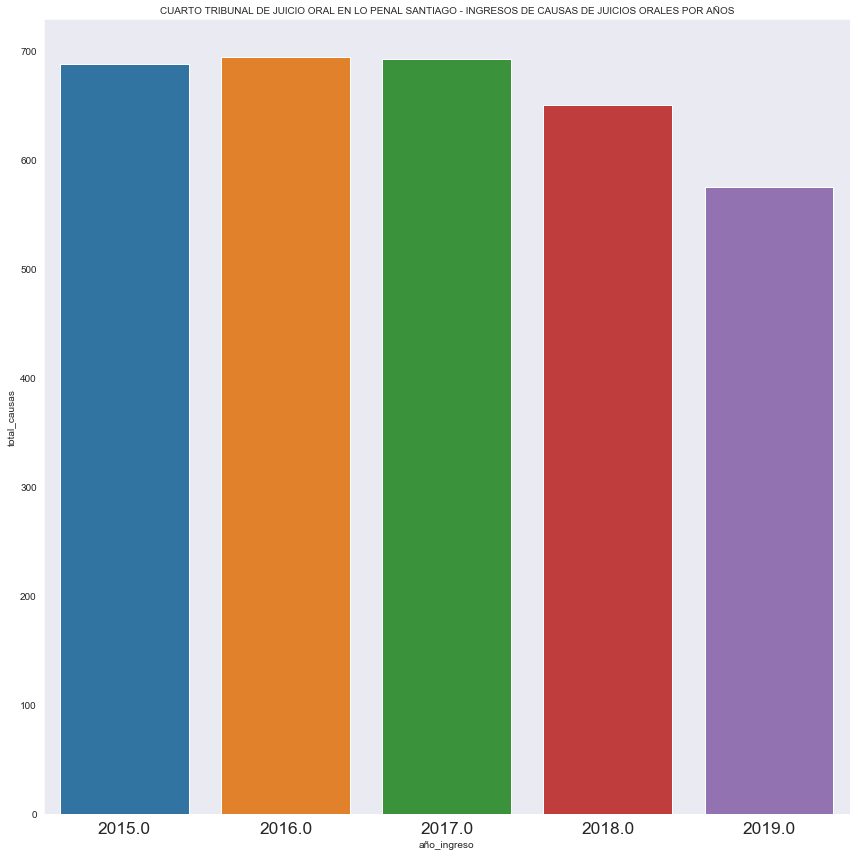

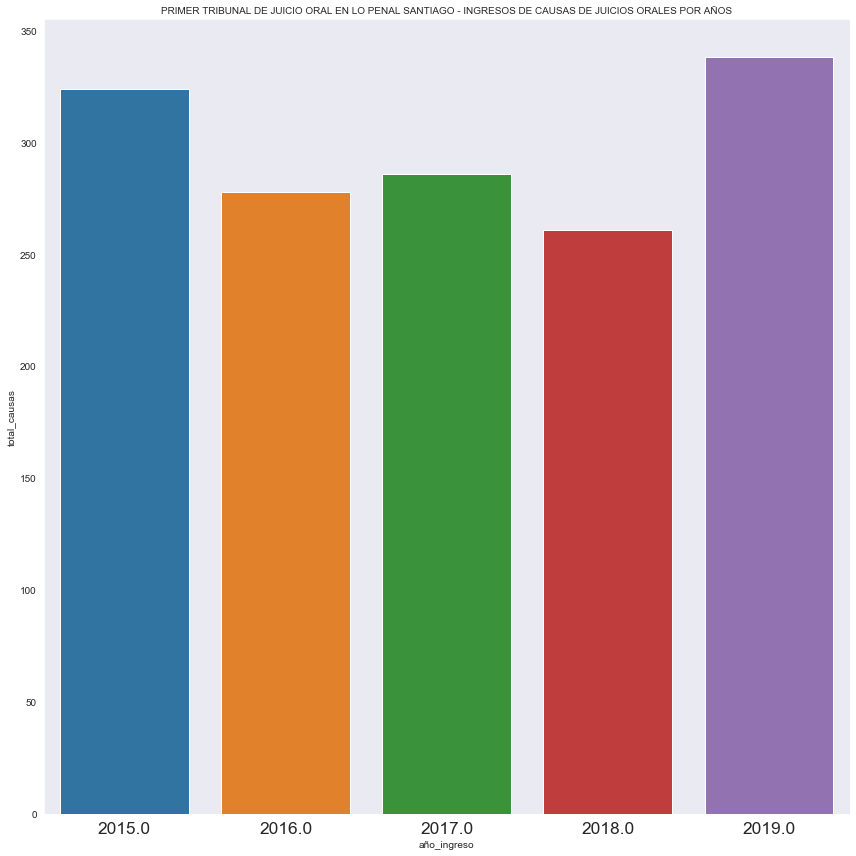

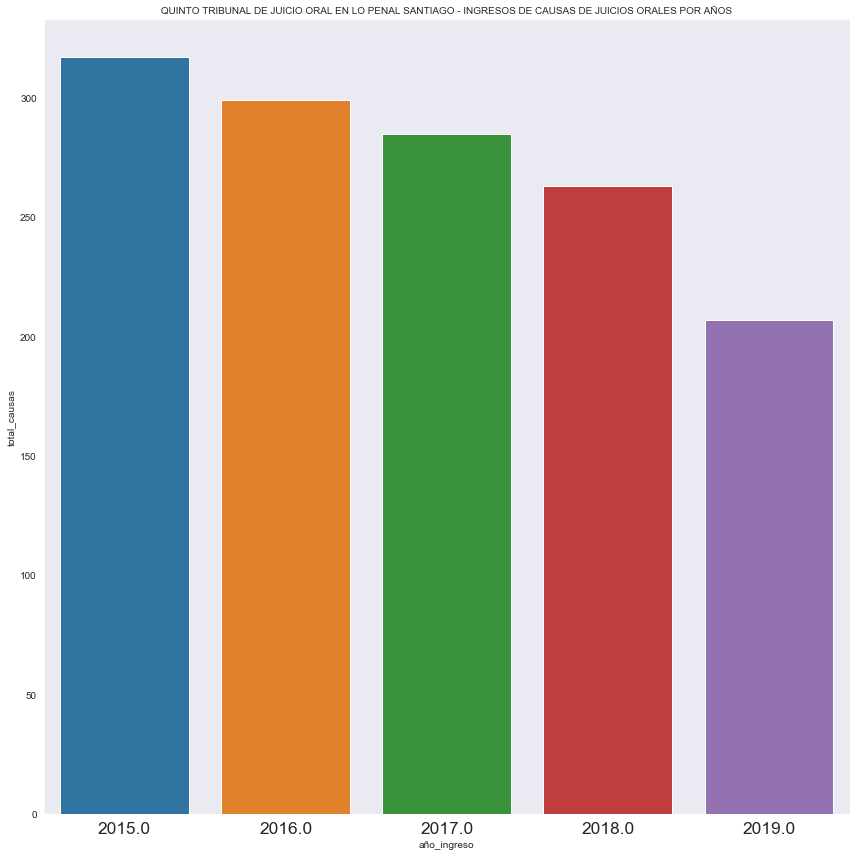

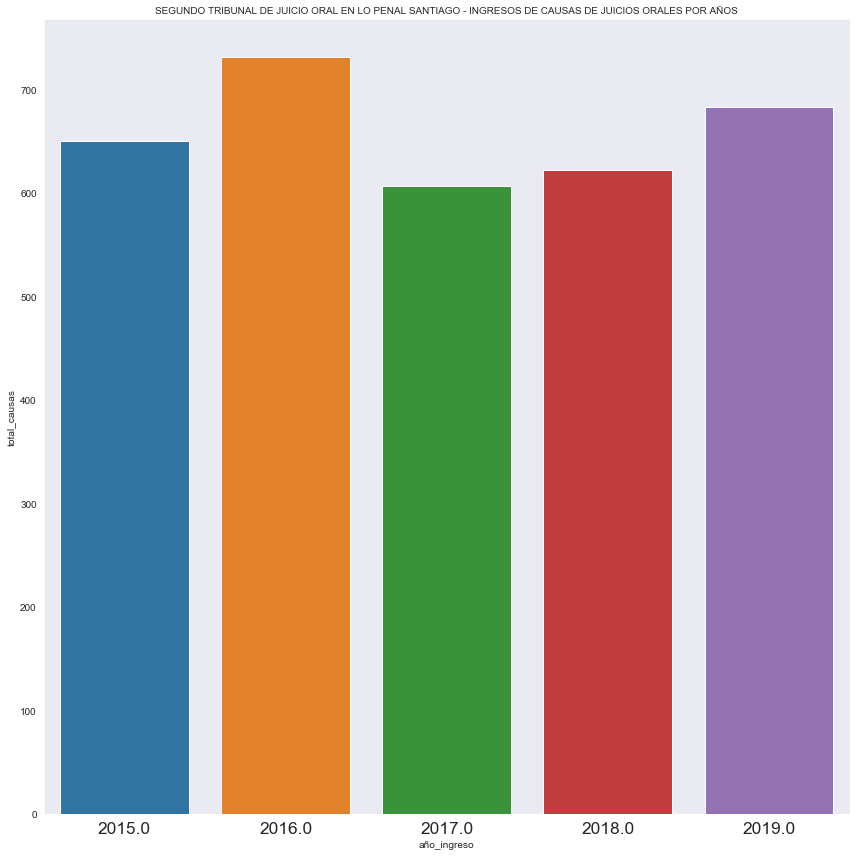

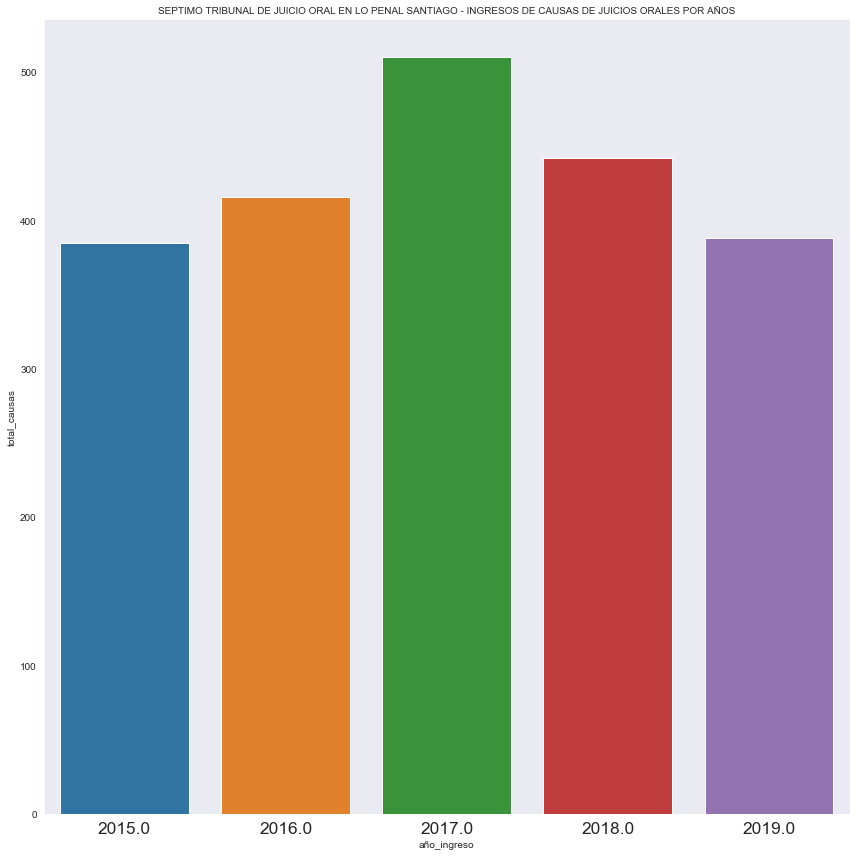

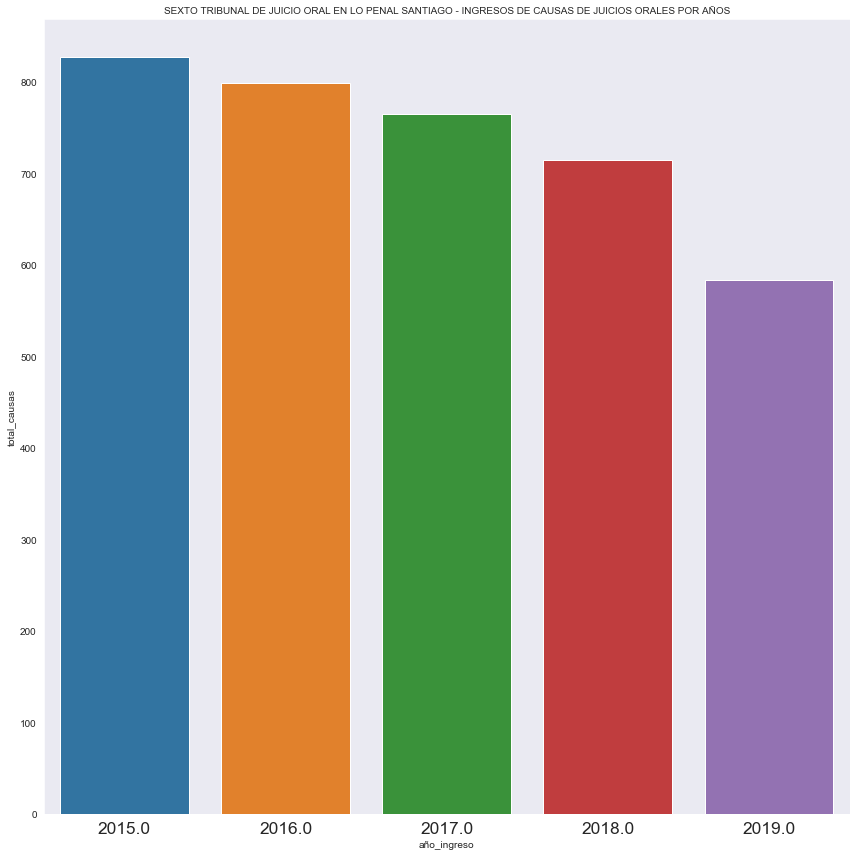

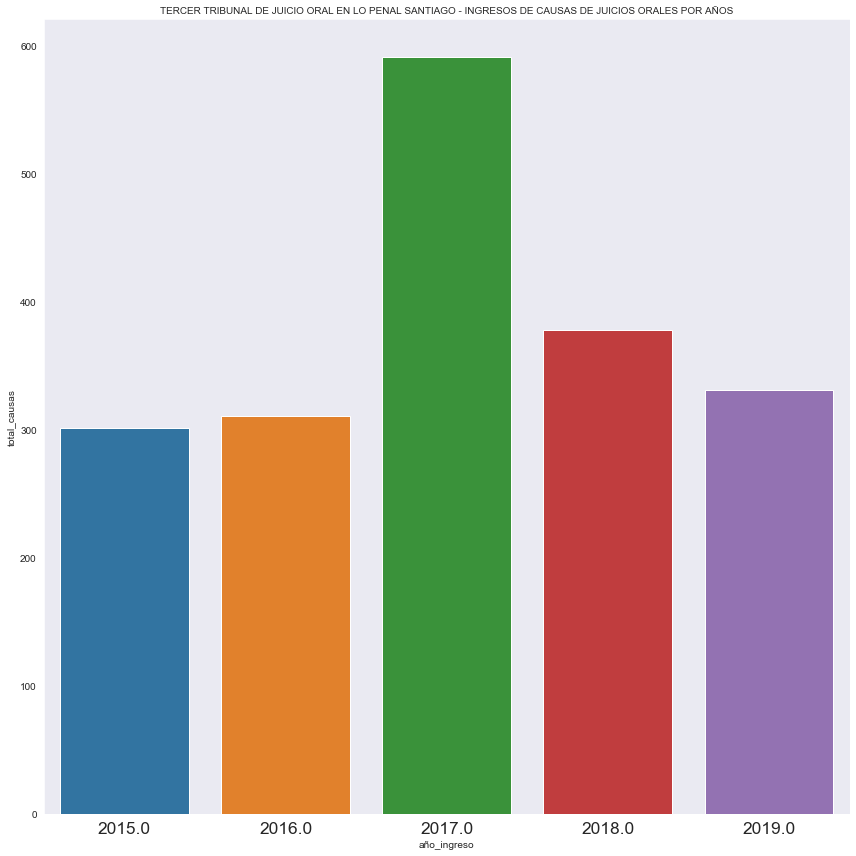

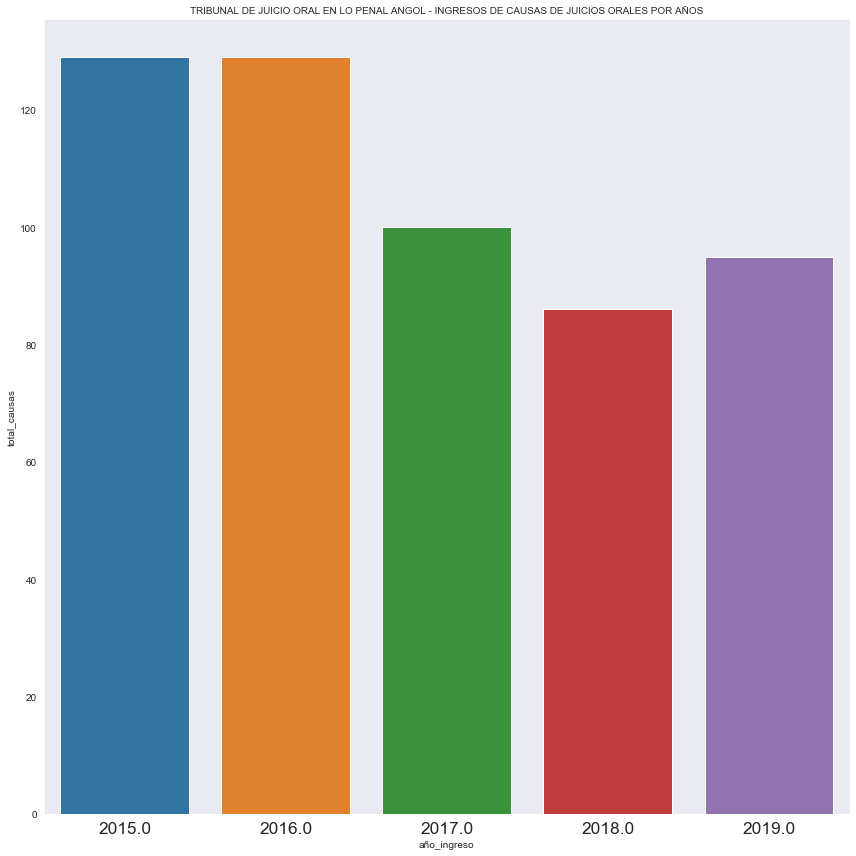

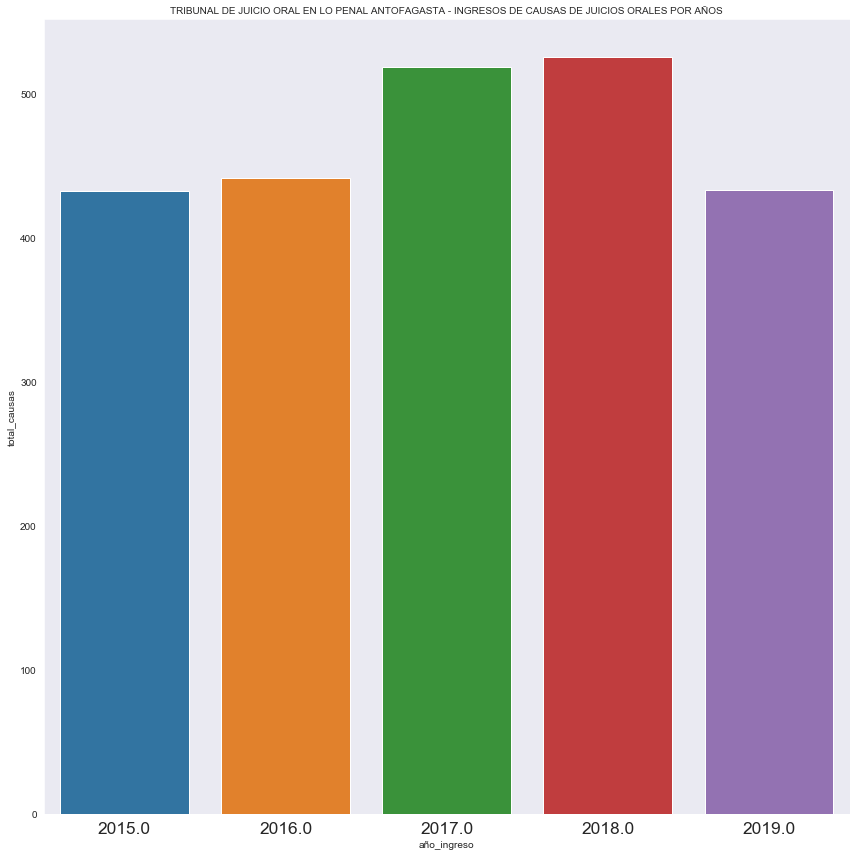

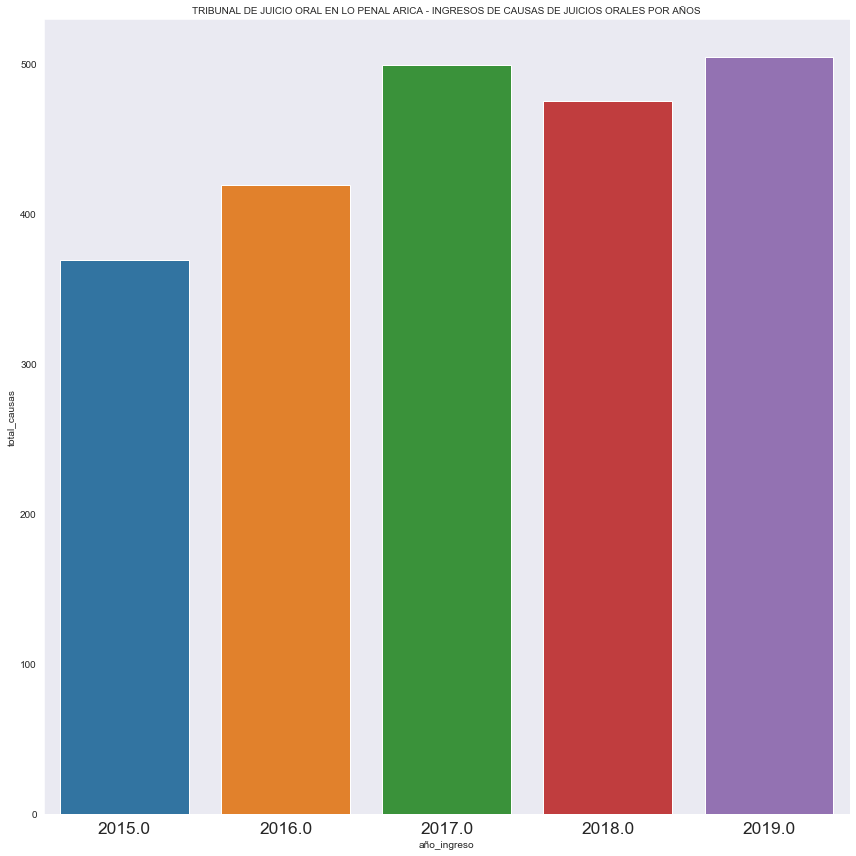

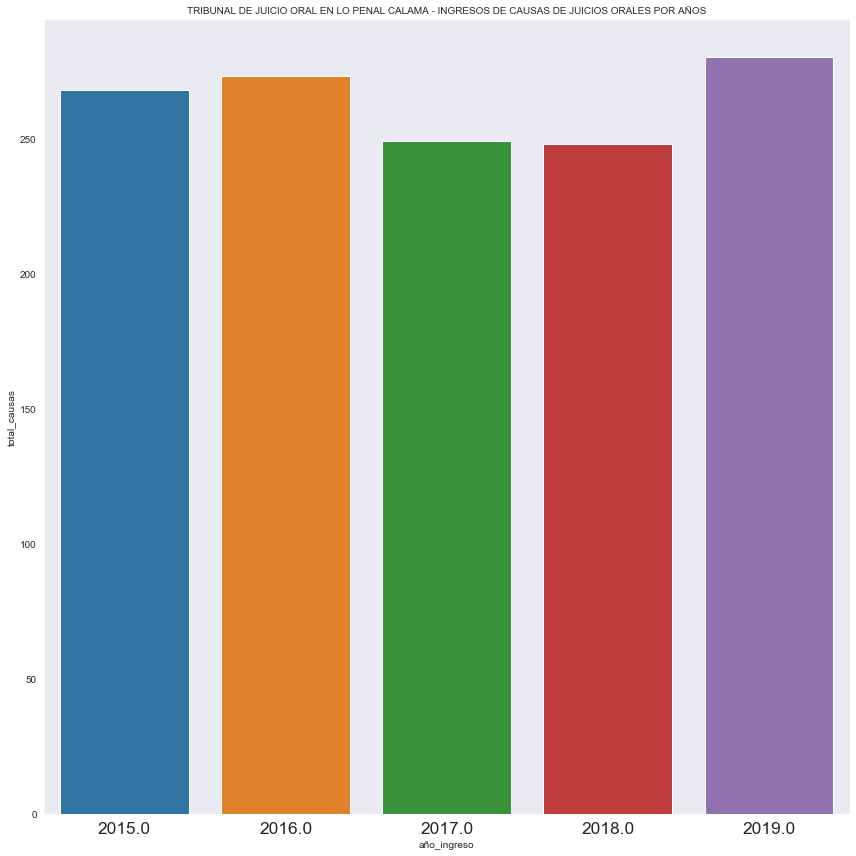

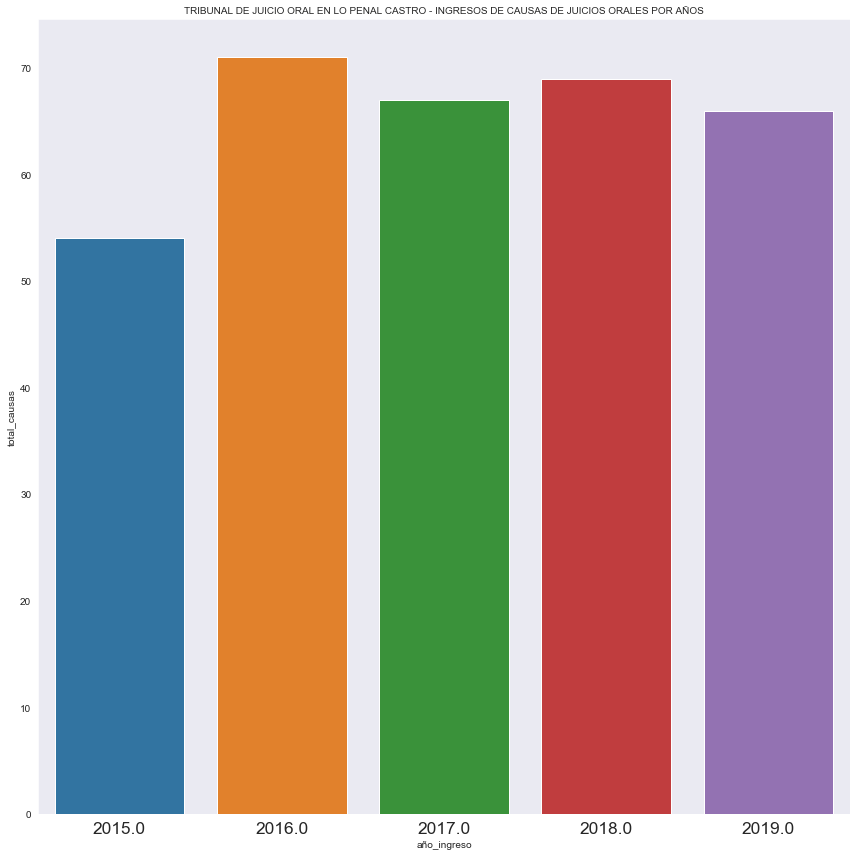

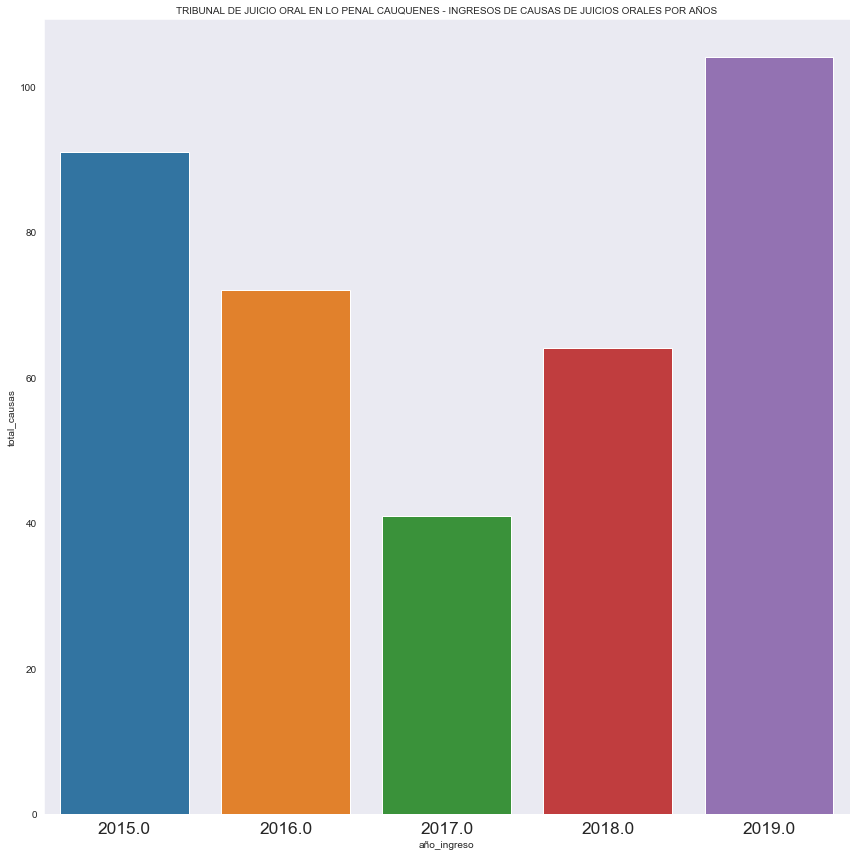

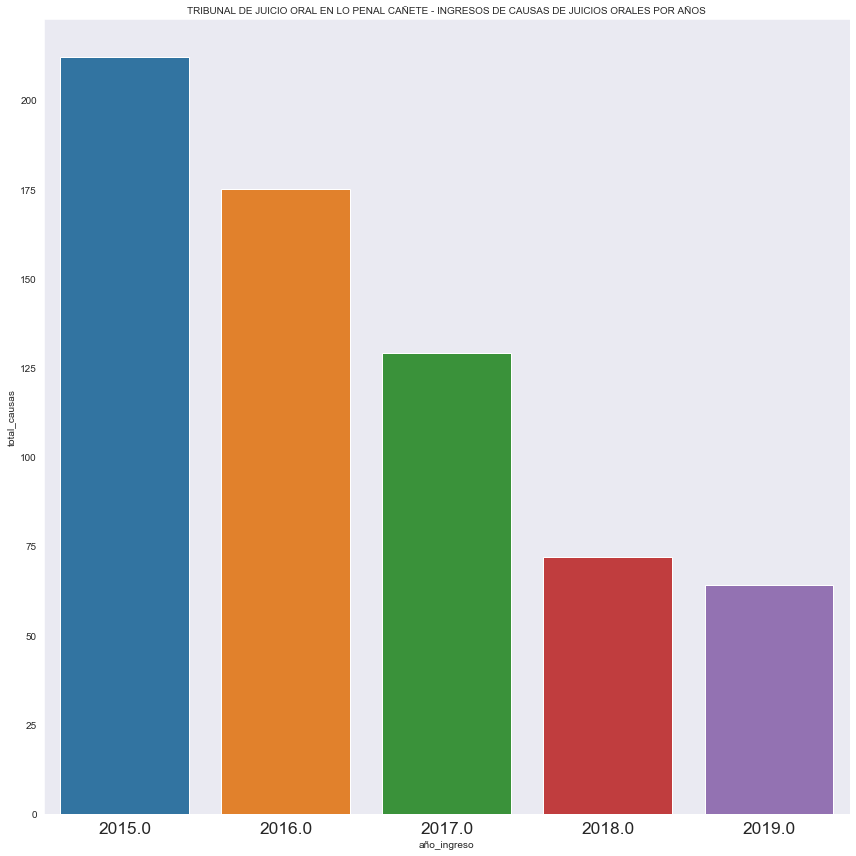

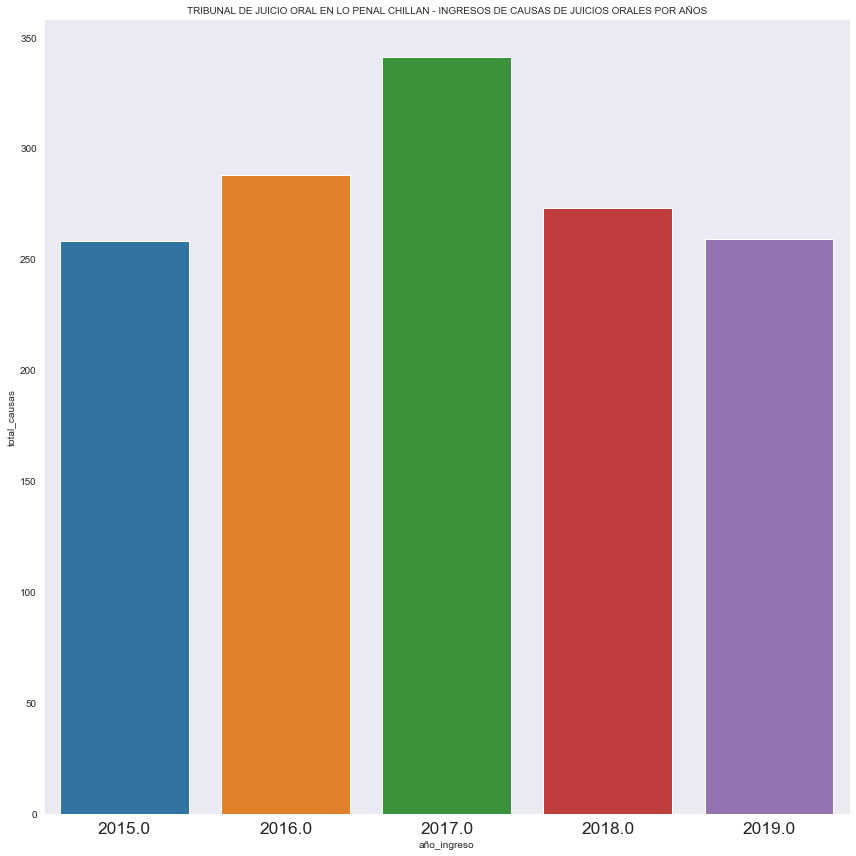

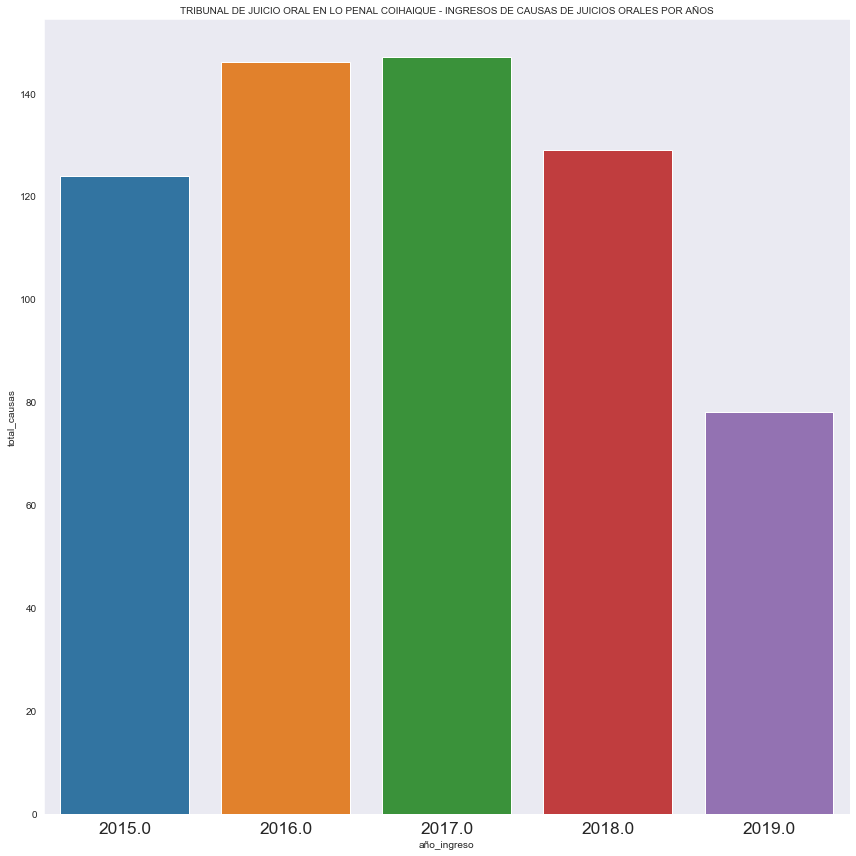

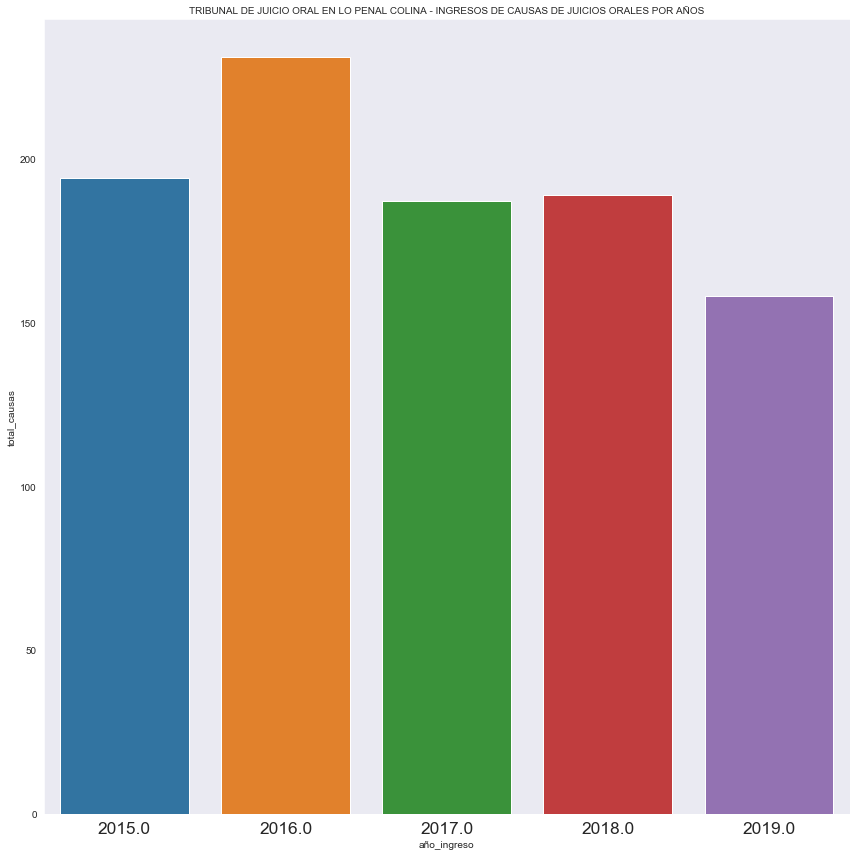

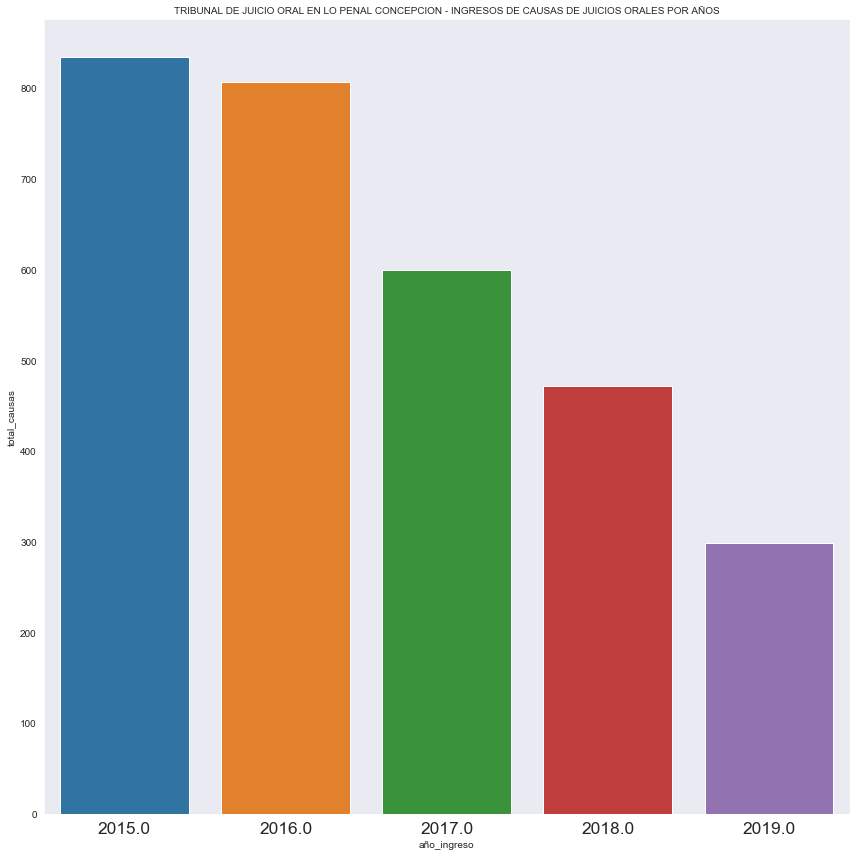

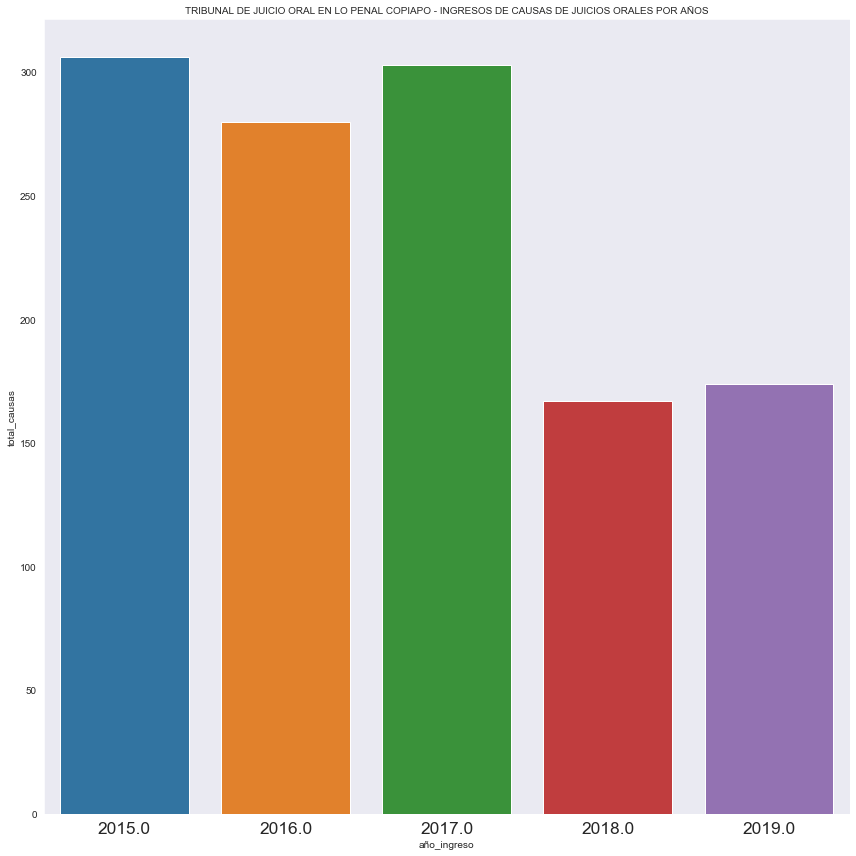

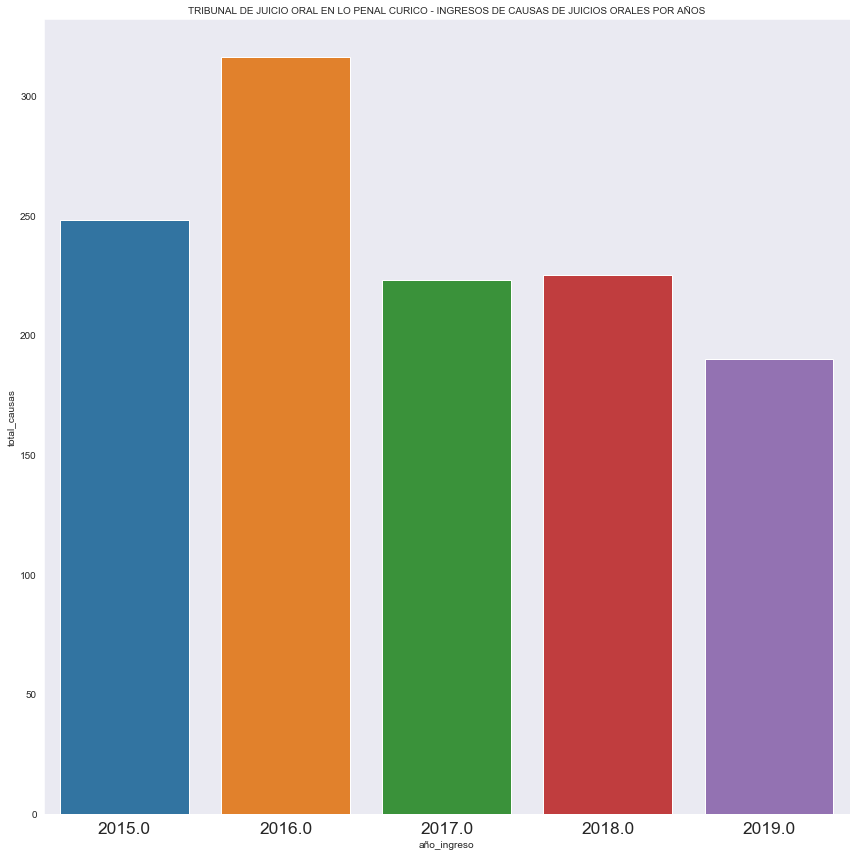

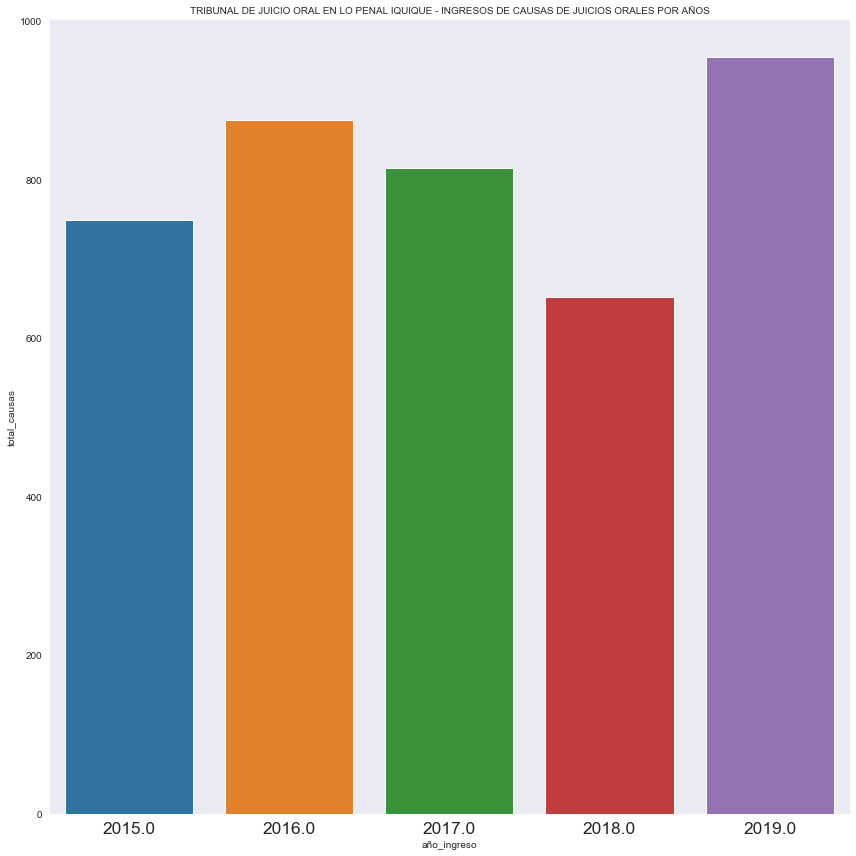

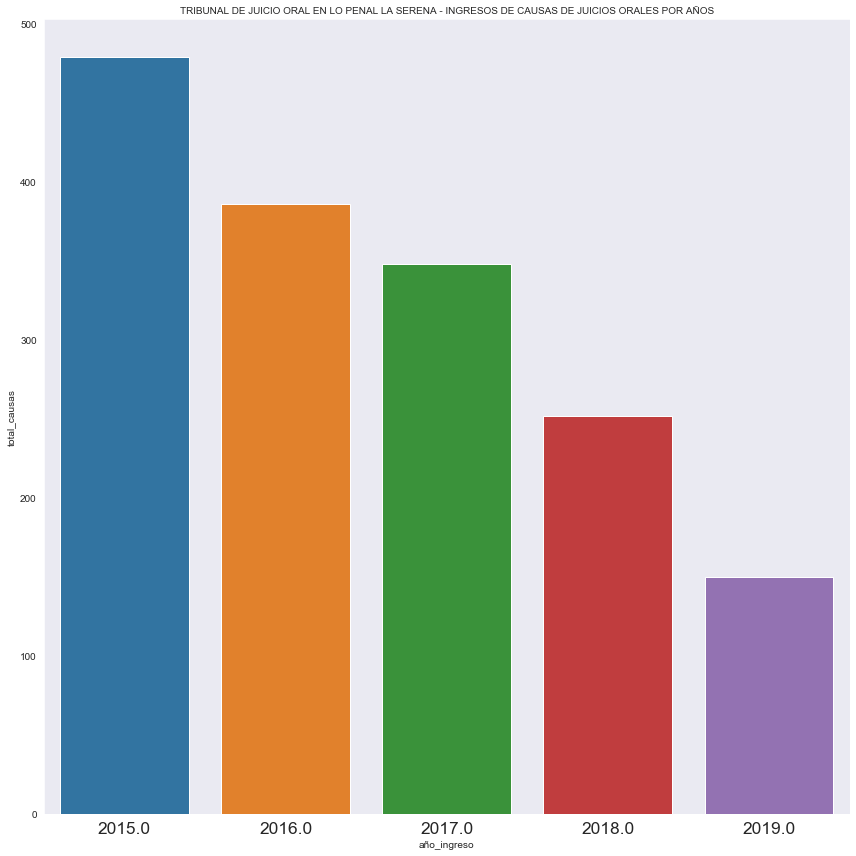

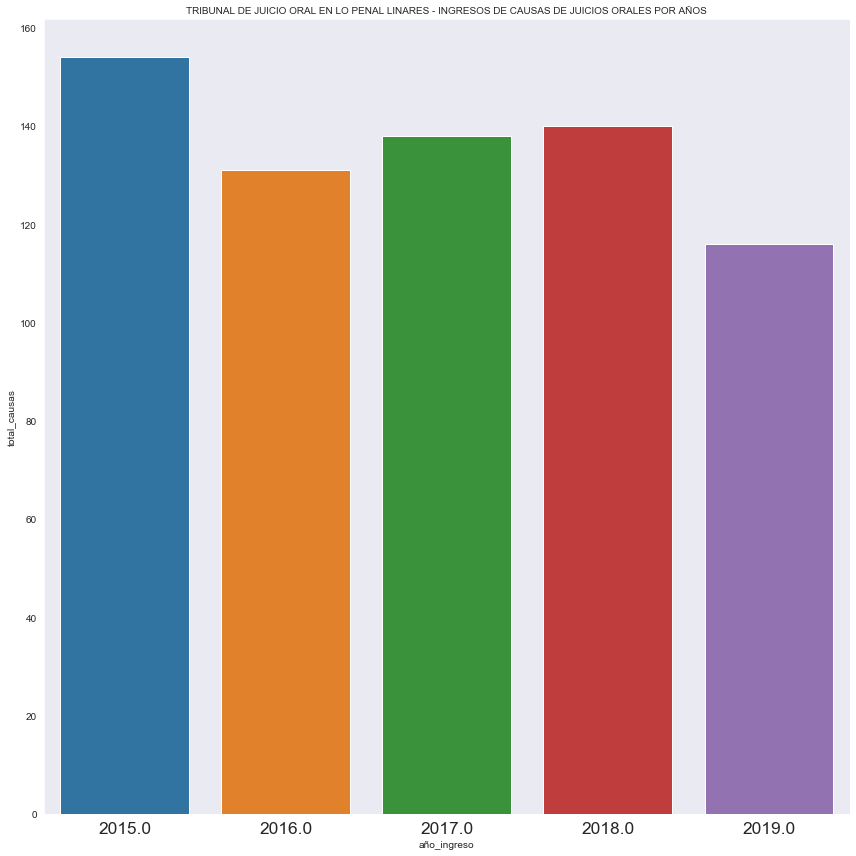

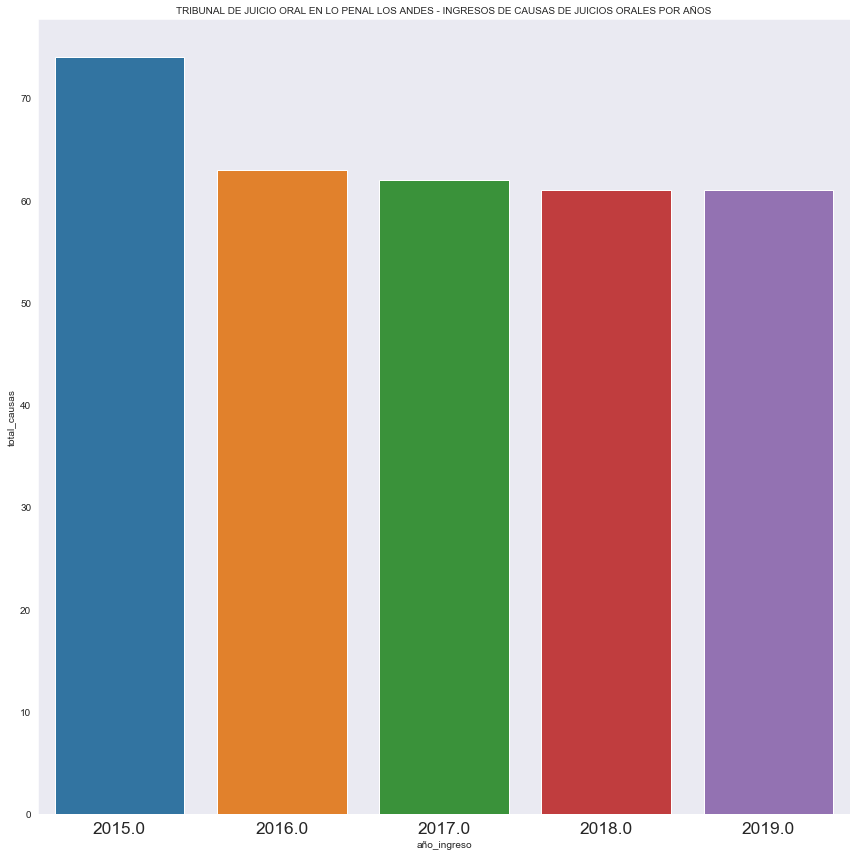

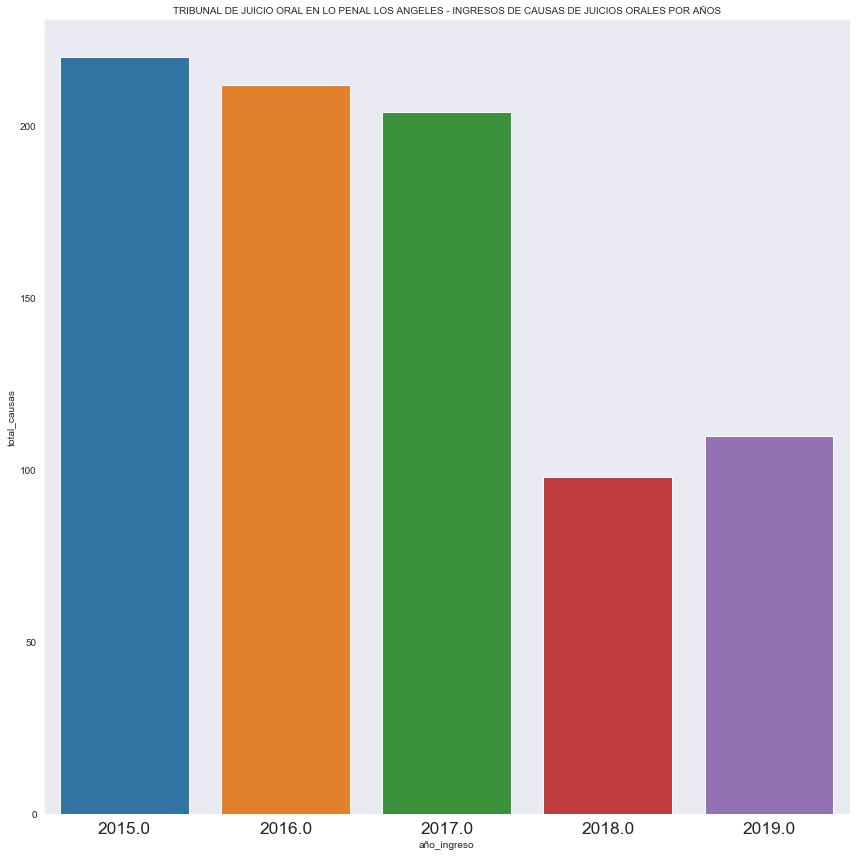

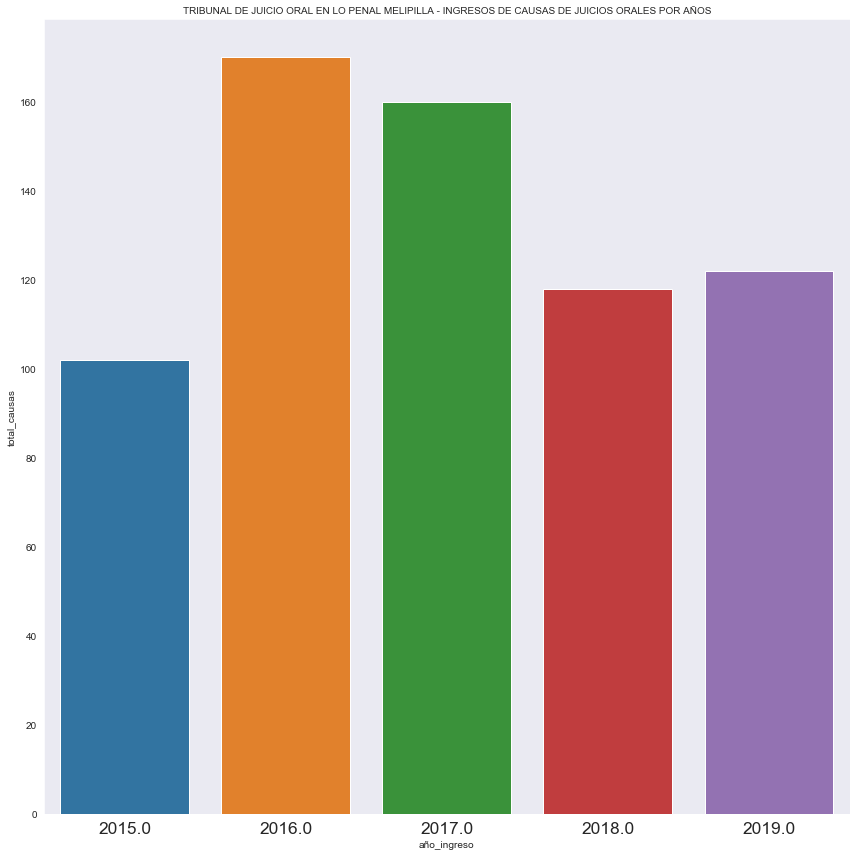

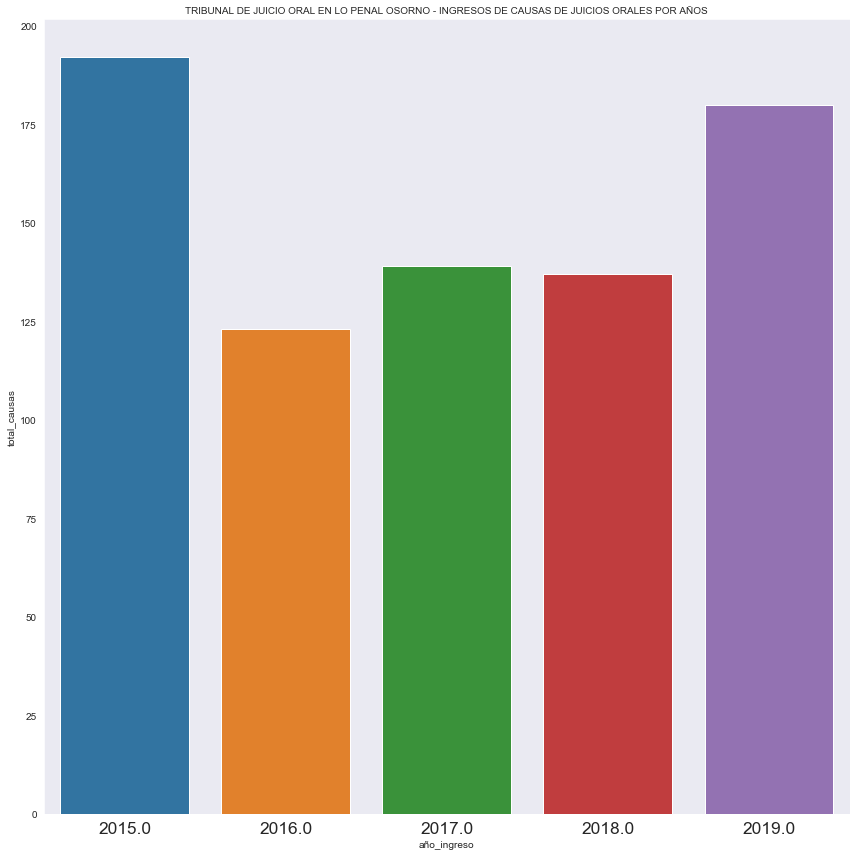

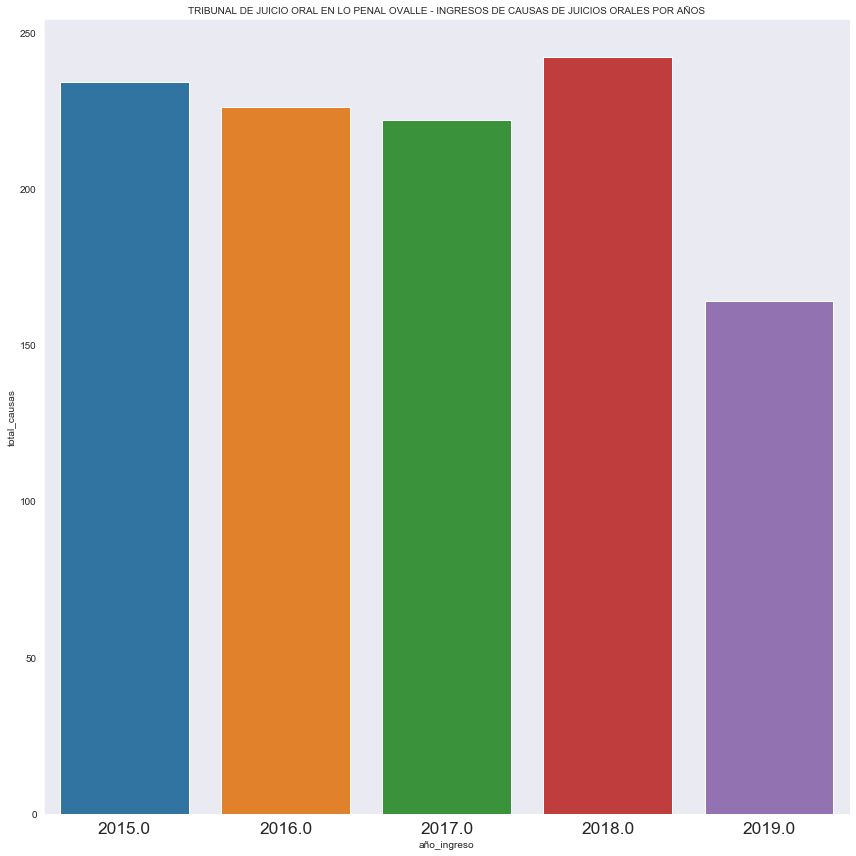

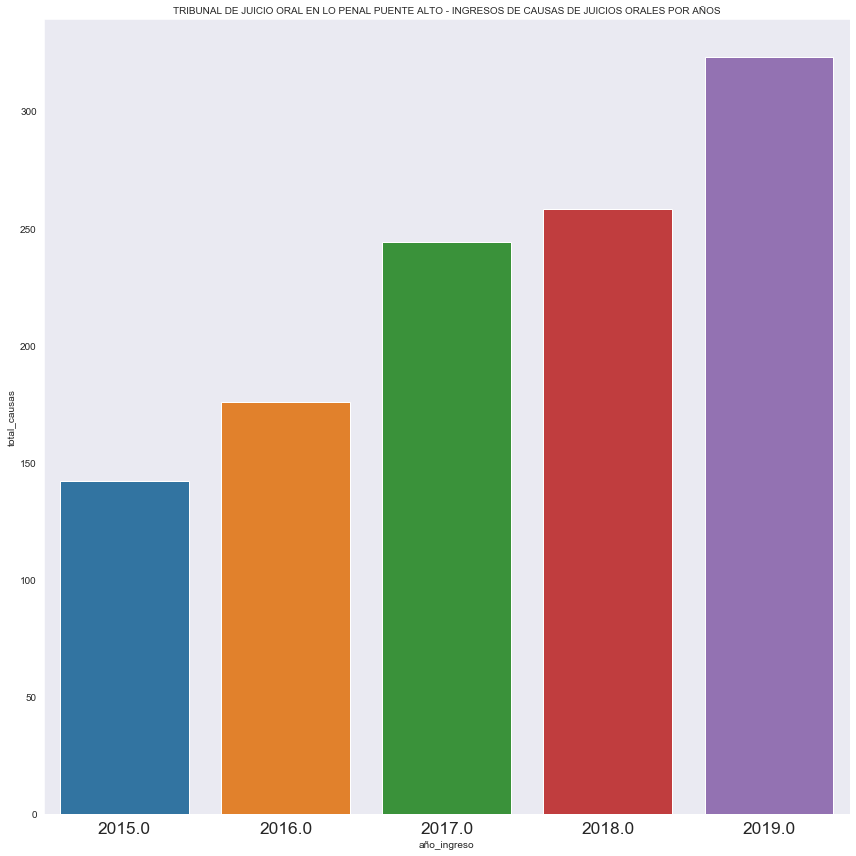

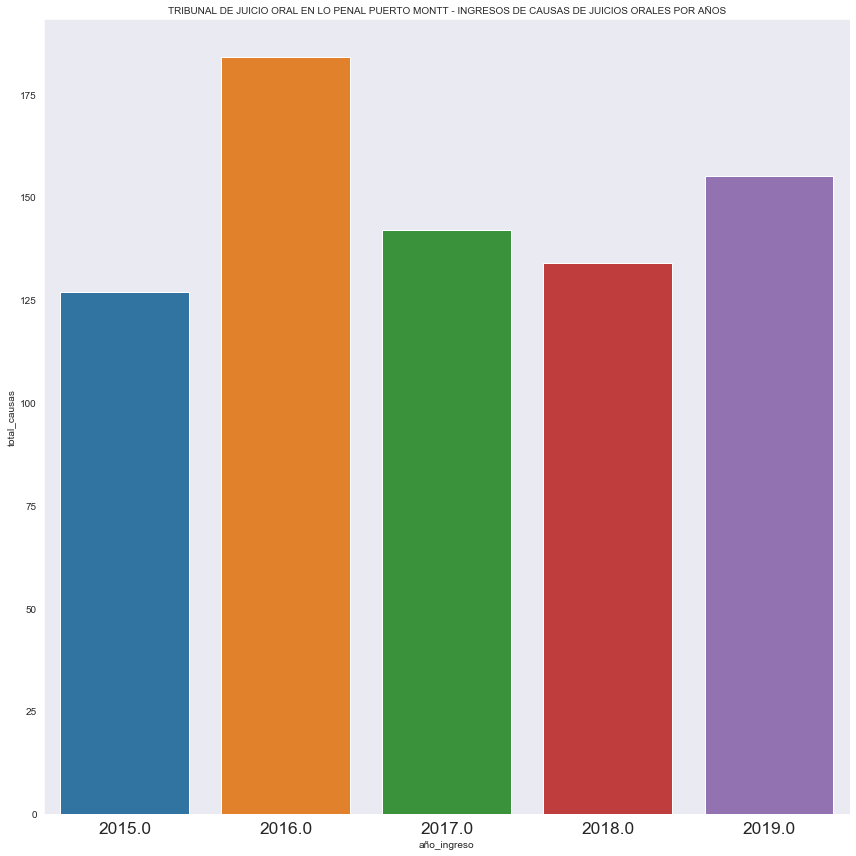

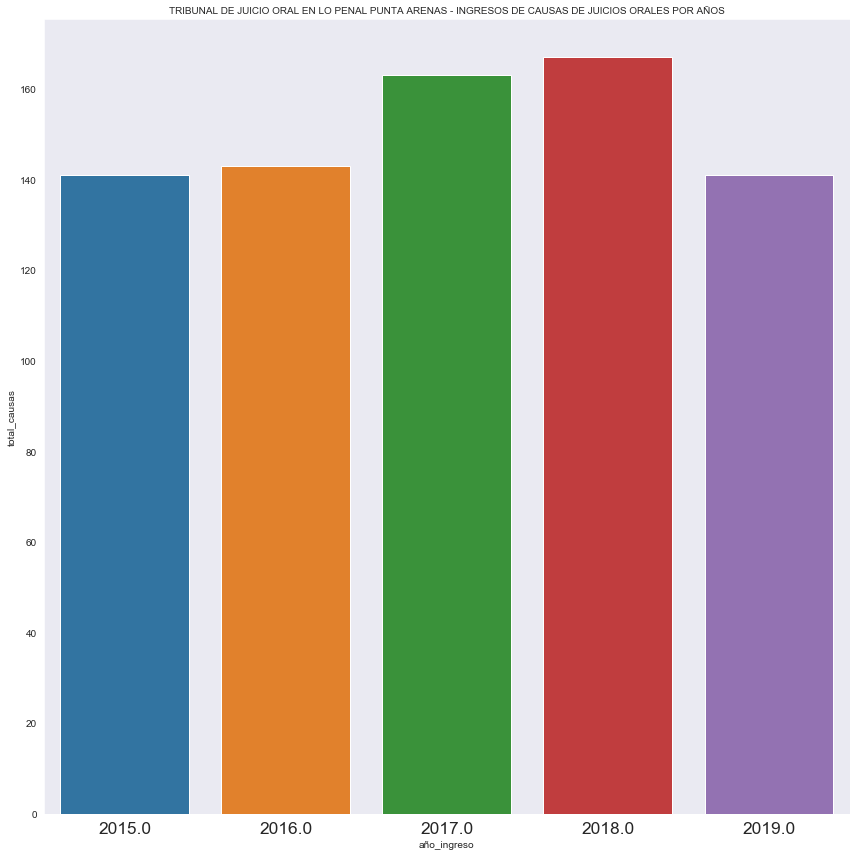

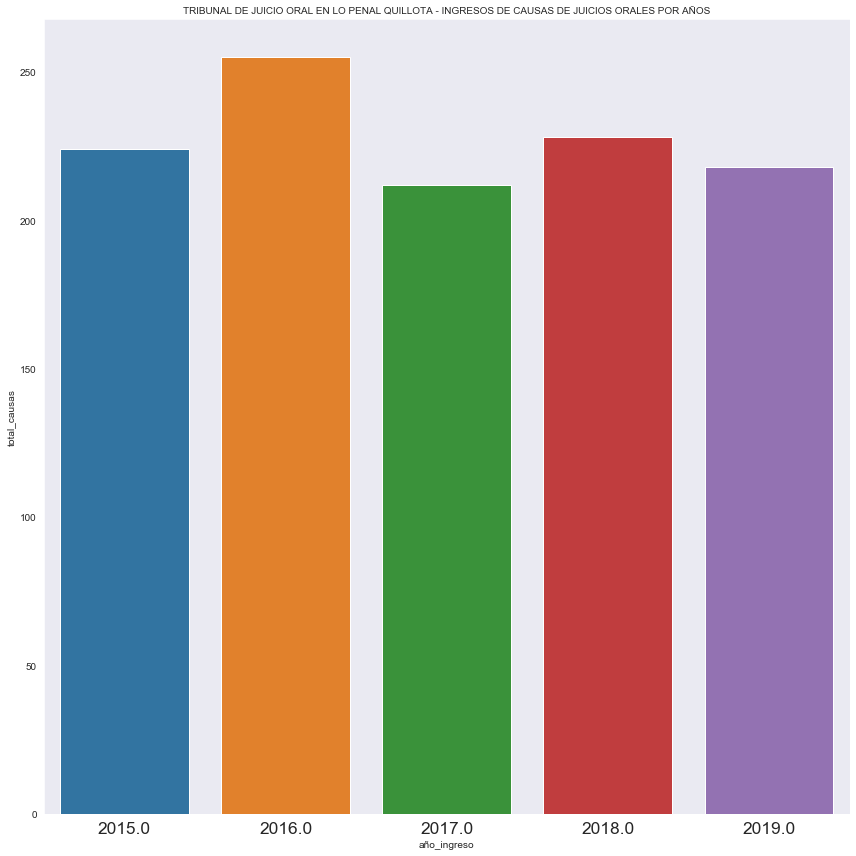

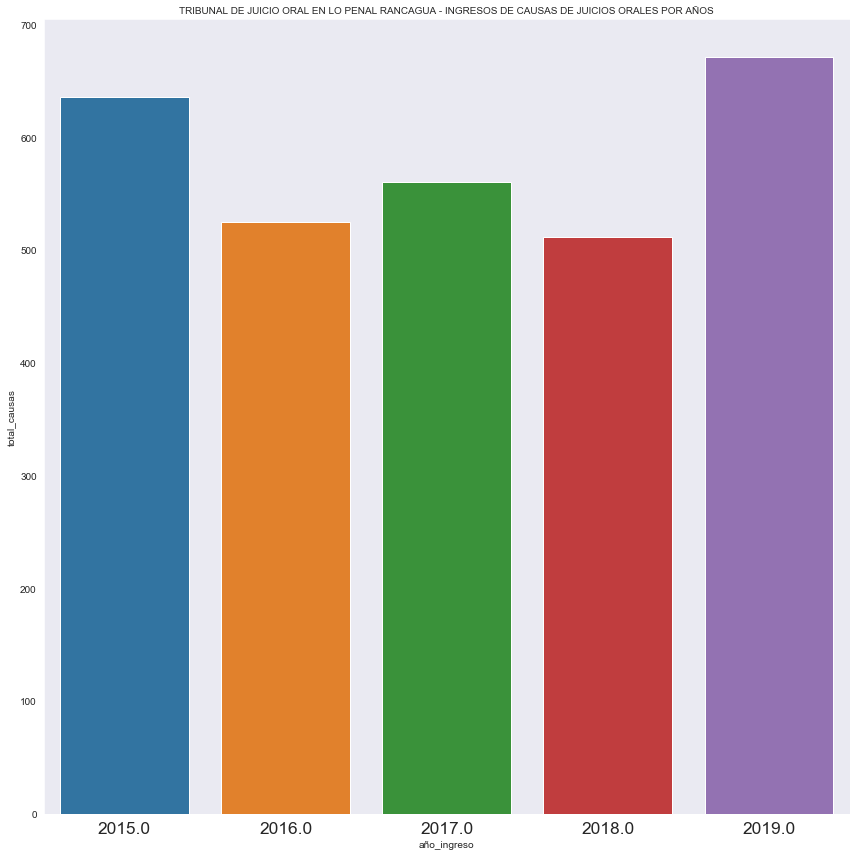

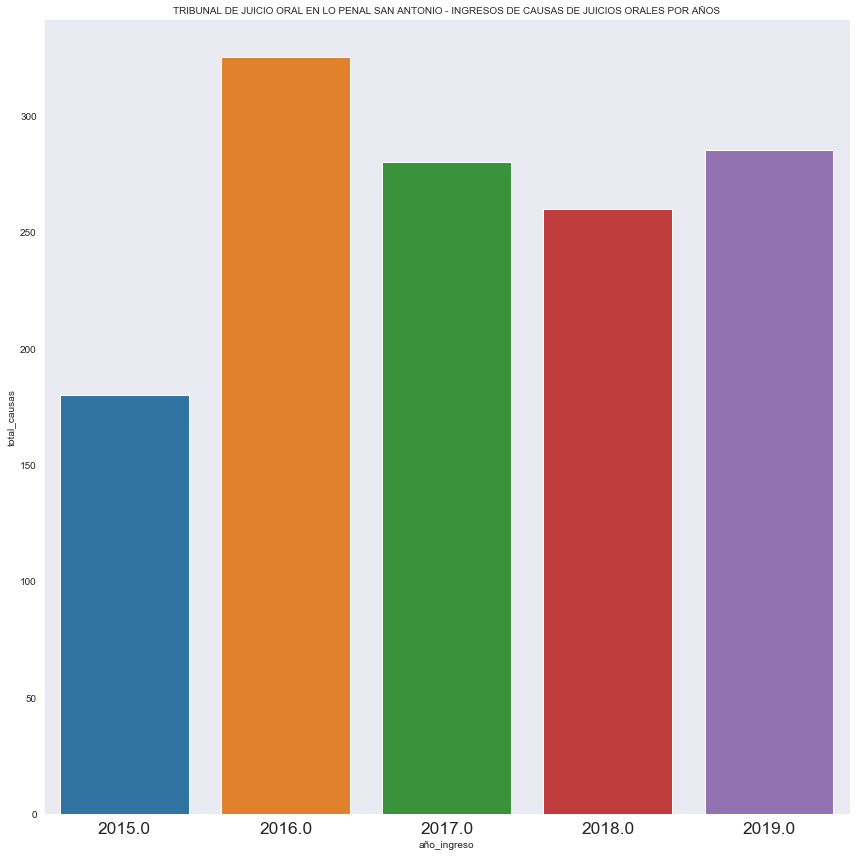

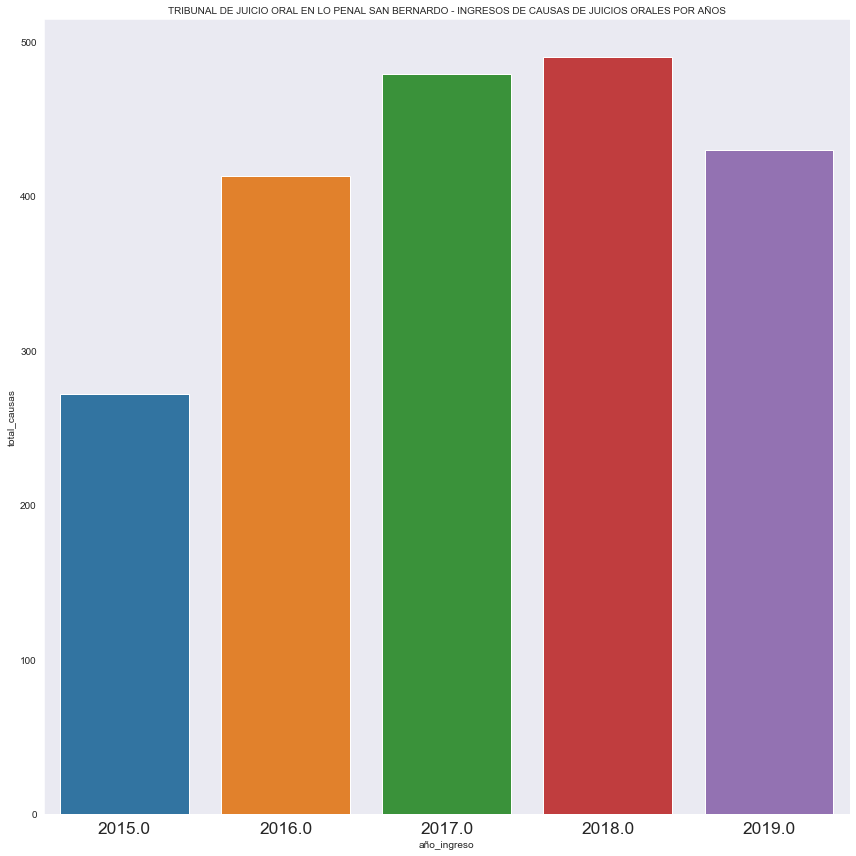

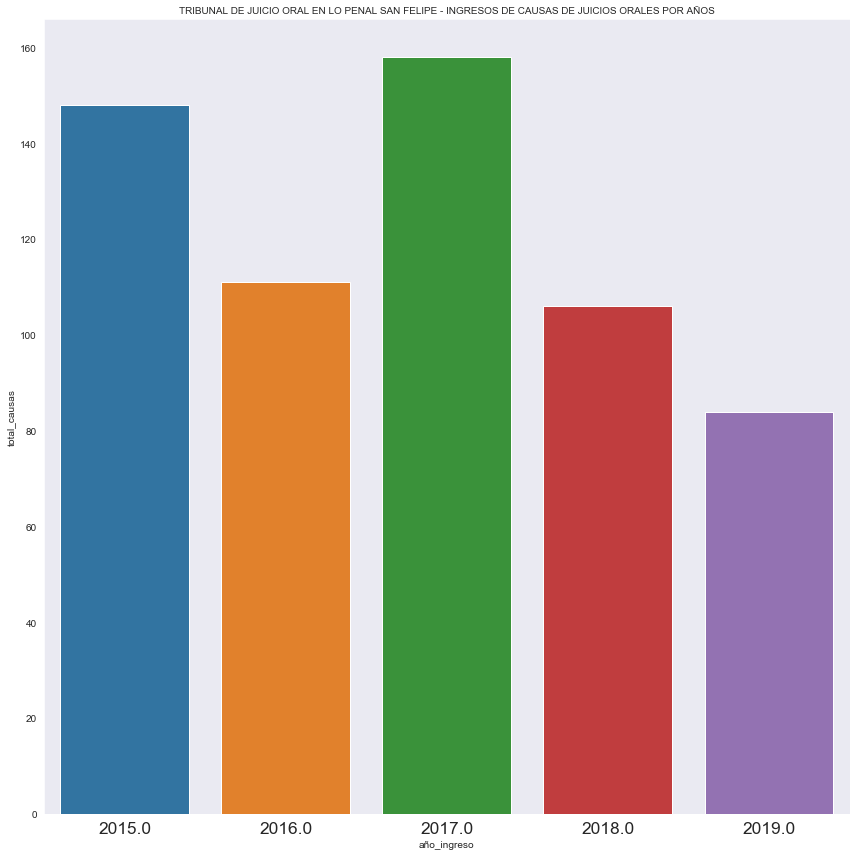

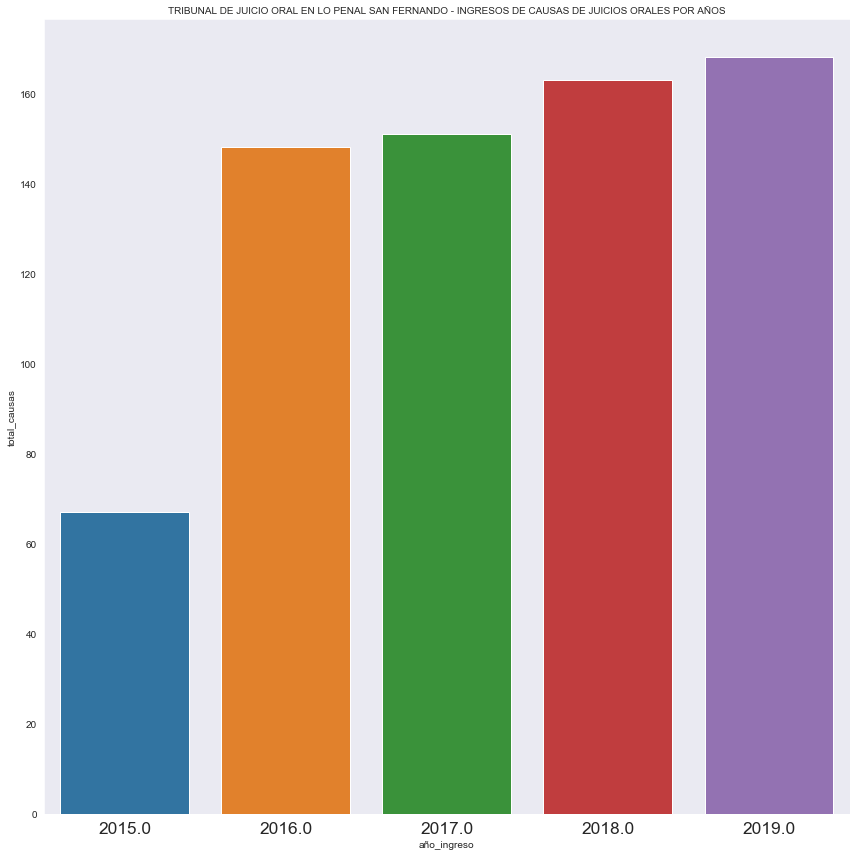

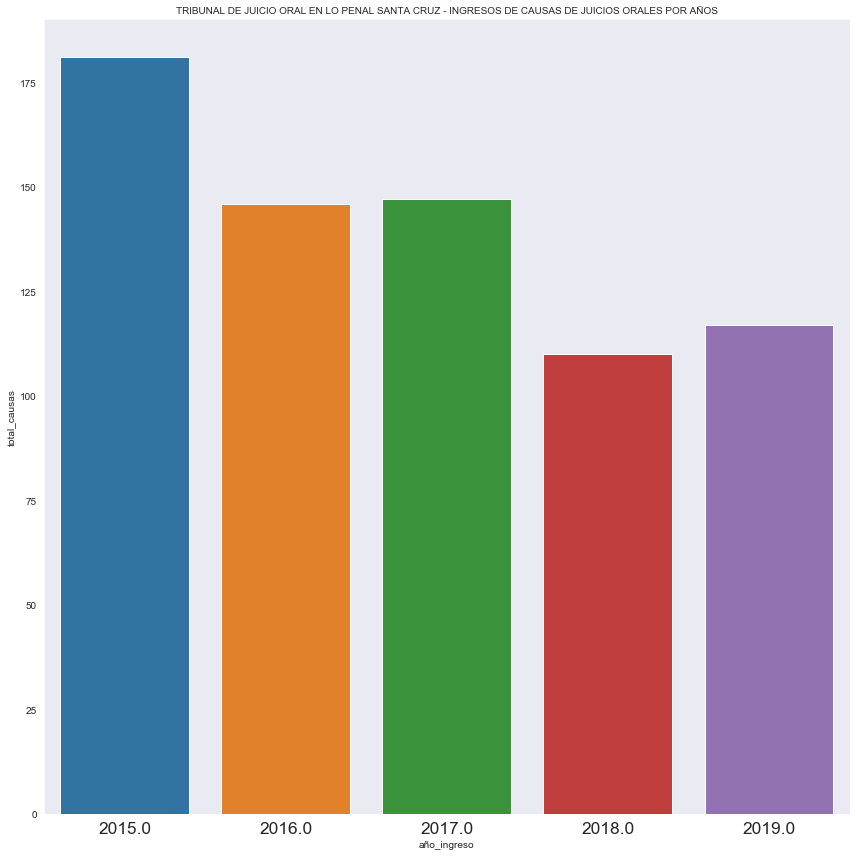

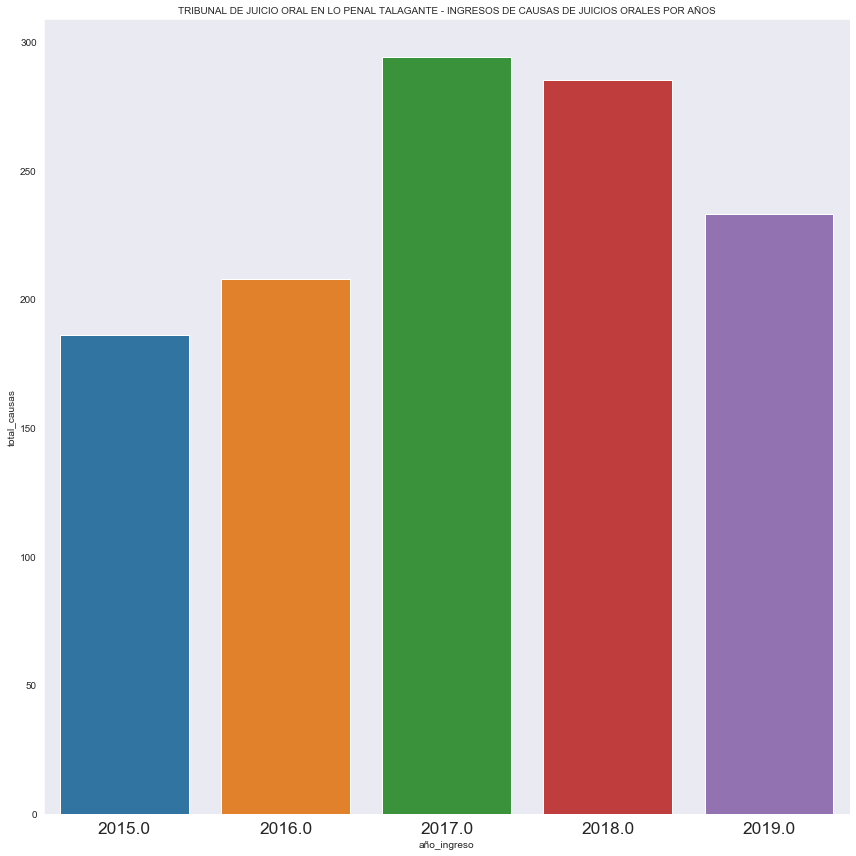

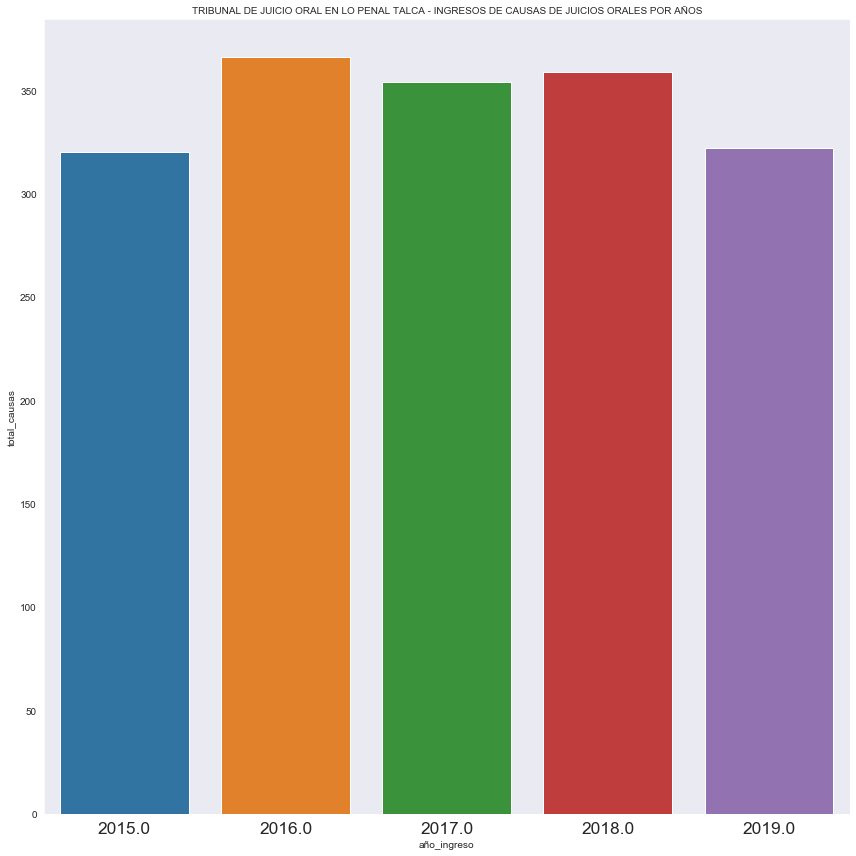

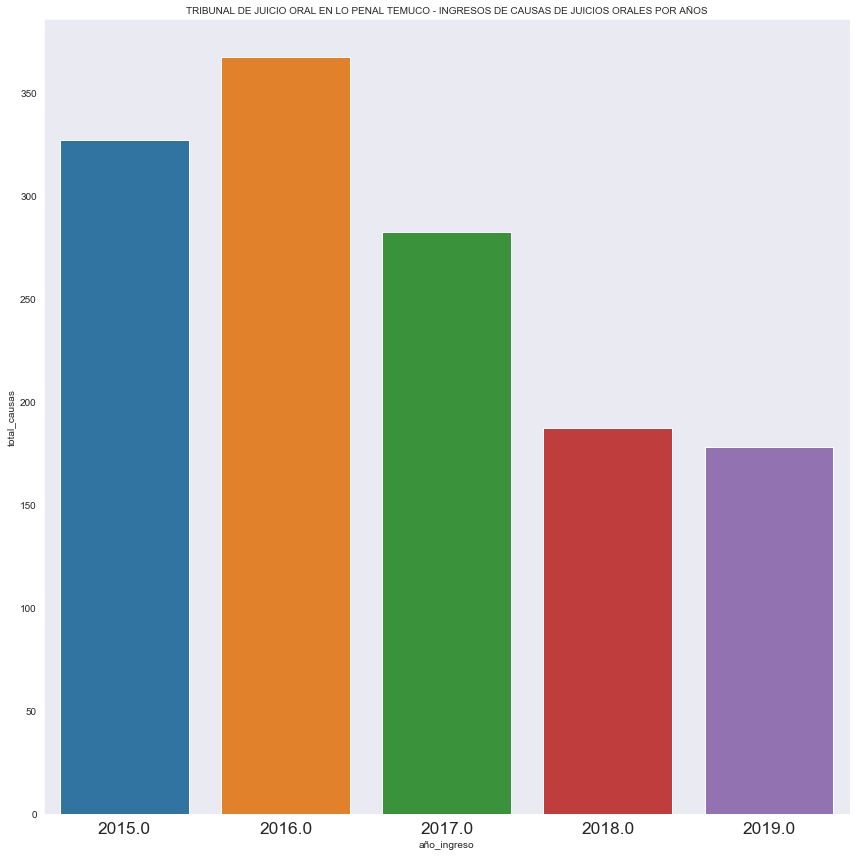

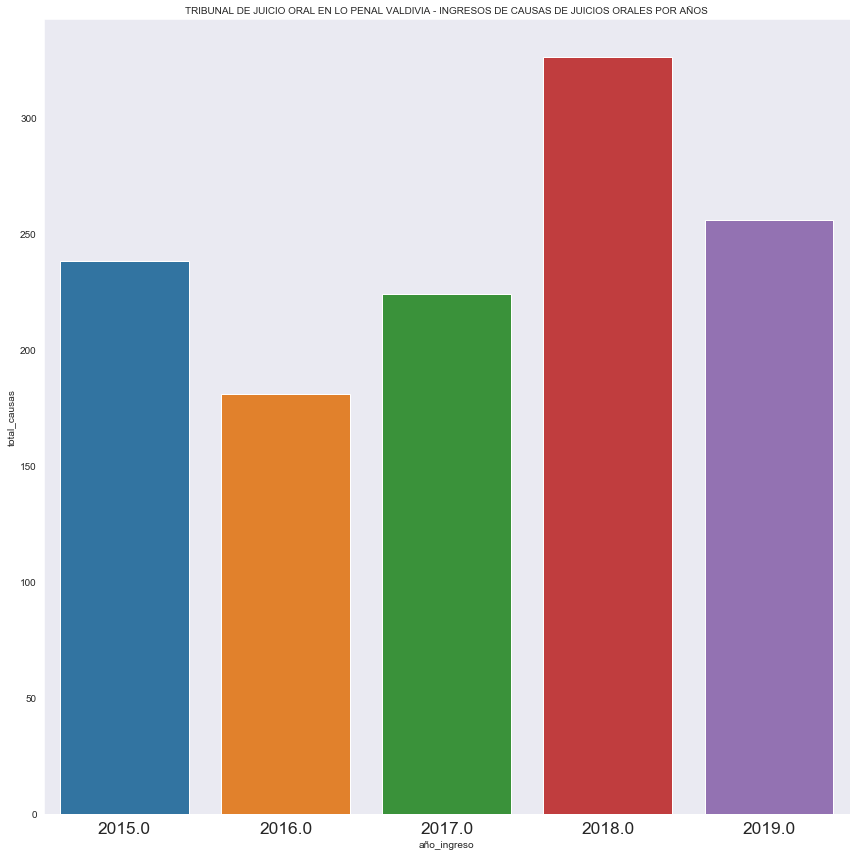

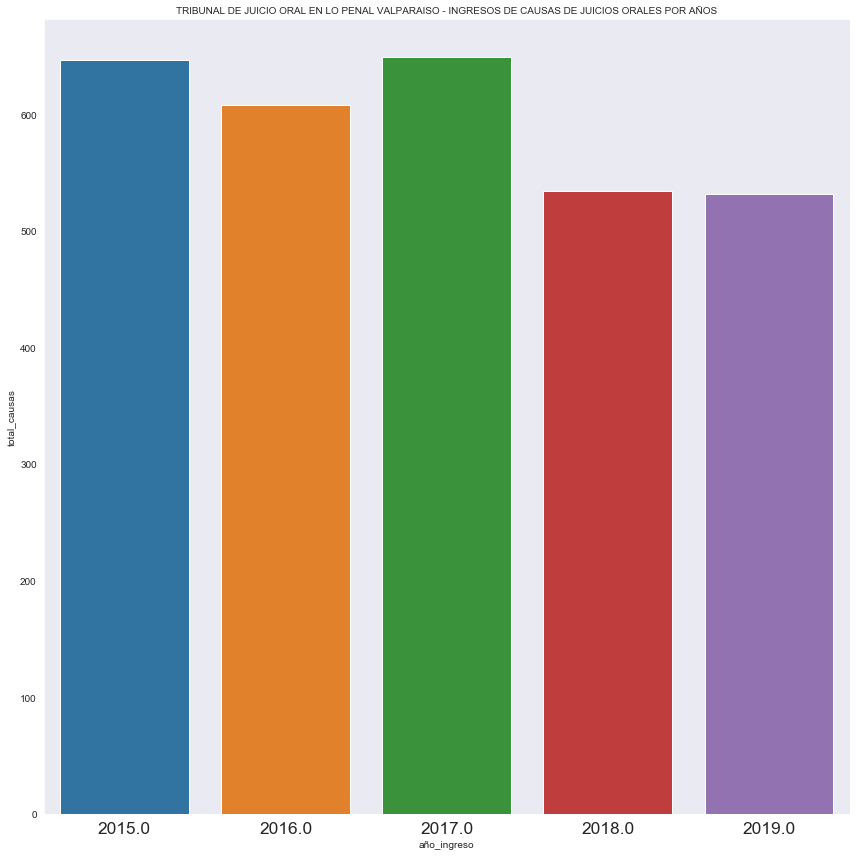

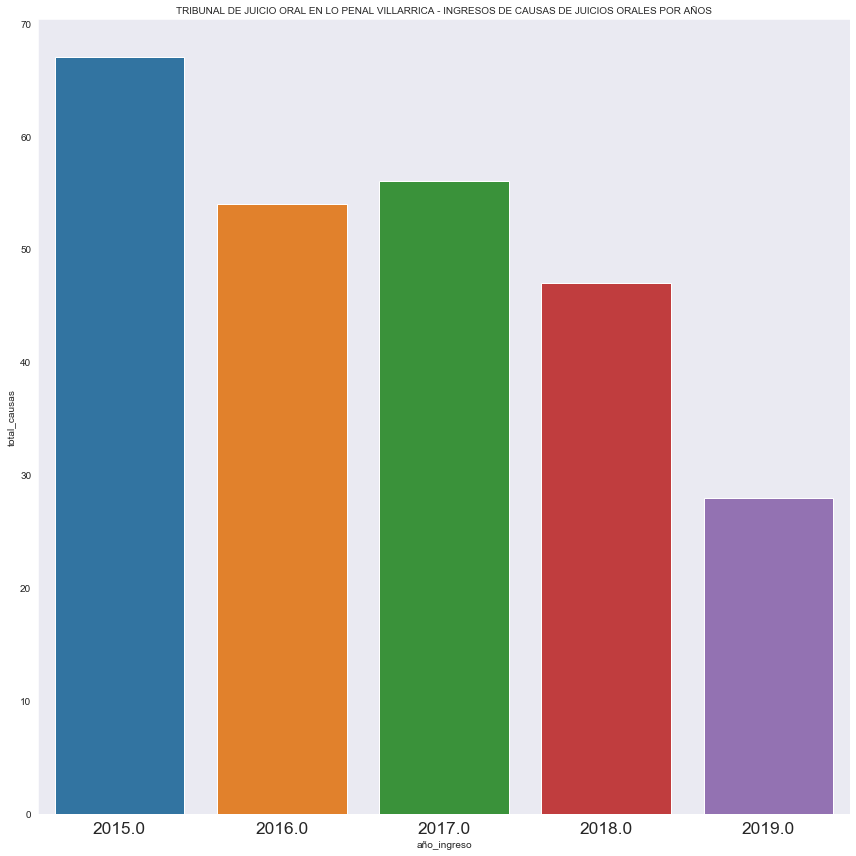

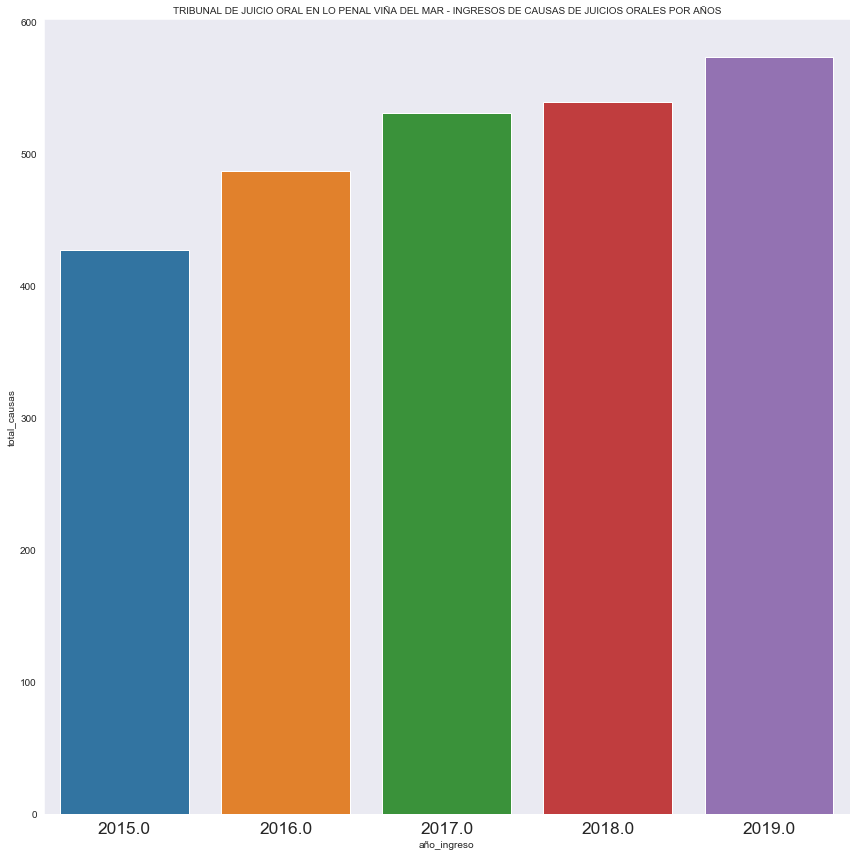

In [76]:
for tribunal in df_totales_tribunales['tribunal'].unique():
    condicion = f"tribunal == '{tribunal}'"
    summary = df_totales_tribunales.query(condicion)

    plt.figure(figsize=(12,12))
    title = f'{tribunal} - INGRESOS DE CAUSAS DE JUICIOS ORALES POR AÑOS'
    plt.title(title, fontsize=10)

    ax = sns.barplot(x='año_ingreso', y='total_causas', data=summary)
    
    ax.xaxis.set_tick_params(labelsize='xx-large')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{title}.svg')

    plt.show()